# $MMAE-5000$ Project for Pinns in Diffusion 2D
"""
Created on Thu Feb 23 14:05:18 2023
@author: eyob
"""

In [ ]:
# just need thes libraries.... required  becasue I'm using Latex for my reoport and import science plot style.
!pip install git+https://github.com/garrettj403/SciencePlots
!pip install latex
! sudo apt-get install texlive-latex-recommended 
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended  
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip 
! unzip type1cm.zip -d /tmp/type1cm 
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm 
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm 
! sudo texhash 
!apt install cm-super

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import scienceplots
import latex
plt.style.use(['science','grid'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                150       
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,751
Trainable params: 2,751
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


13/13 [==============================] - 1s 14ms/step - loss: 0.0133 - val_loss: 6.8133e-04
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0094 - val_loss: 5.3269e-04
Epoch 3/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0075 - val_loss: 0.0021
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0062 - val_loss: 5.0694e-04
Epoch 5/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0047 - val_loss: 0.0024
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0037 - val_loss: 0.0014
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - val_loss: 2.1542e-04
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 1.0774e-04
Epoch 9/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 10/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 9.0604e

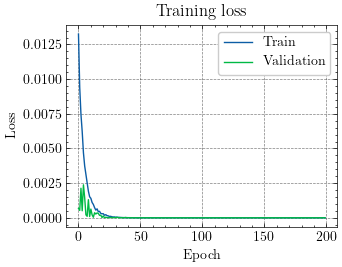

32/32 [==============================] - 0s 2ms/step


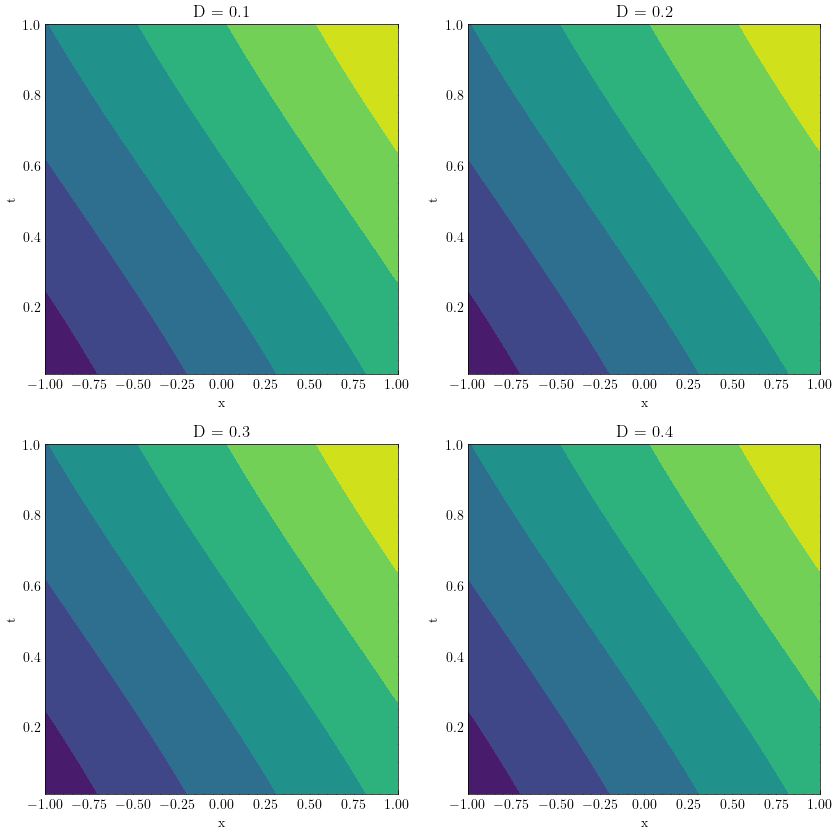

In [ ]:
# this will be my main diffusion equation
def diffusion_equation(x, t, D):
    return 1 / (4 * np.pi * D * t) * np.exp(-np.linalg.norm(x) ** 2 / (4 * D * t))

# Direlcht's and Neumanns boundary conditions depending we'll seeeeee
x = np.linspace(-1, 1, 50)
t = np.linspace(0.01, 1, 20)
X, T = np.meshgrid(x, t)
X_flat = X.flatten()
T_flat = T.flatten()
D_values = [0.1, 0.2, 0.3, 0.4]
N = X_flat.shape[0]

# Generating training data
X_train = np.zeros((N * len(D_values), 2))
y_train = np.zeros((N * len(D_values), 1))
for i, D in enumerate(D_values):
    y = diffusion_equation(np.vstack((X_flat, T_flat)).T, 1, D)
    X_train[i * N:(i + 1) * N, :] = np.vstack((X_flat, T_flat)).T
    y_train[i * N:(i + 1) * N, :] = y.reshape(-1, 1)

# randmoizw the training data and then i will choose the model
perm = np.random.permutation(N * len(D_values))
X_train = X_train[perm]
y_train = y_train[perm]


model = Sequential()
model.add(Dense(50, input_shape=(2,), activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(50, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))
model.summary()


optimizer = RMSprop(lr=0.001)
model.compile(loss='mse', optimizer=optimizer)

# Training the model
history = model.fit(X_train, y_train, epochs=200, batch_size=256, verbose=1, validation_split=0.2)

#Plotting the training loss
plt.figure(figsize=(10,6))
plt.figure(figsize=(3.54,3.54), dpi=600)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
# plt.savefig('figure.png', bbox_inches='tight') just so i can save and  plot the graph
plt.show()


# setting up my predictions here
y_pred = []
for D in D_values:
    y = model.predict(np.vstack((X_flat, T_flat)).T)
    y_pred.append(y.reshape(X.shape))


# Plotting all coeficeints results
fig, axs = plt.subplots(2, 2, figsize=(8, 8), dpi=600)
for i in range(len(D_values)):
    ax = axs.flat[i]
    ax.contourf(X, T, y_pred[i])
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_title('D = {}'.format(D_values[i]))
fig = plt.savefig('all.png', bbox_inches='tight')
plt.show()

## Part 2 Accross a Plate

In [ ]:

plate_width = plate_height = 10. # mm
spacing_interval_x = spacing_interval_y = 0.1 # mm

thermal_diffusivity = 1.43e-7 # m^2/s i got it online at room temperature of water

# my insitial BC  temperatures
initial_temperature = 293.15 # K
hot_temperature = 373.15 # K
cold_temperature = 273.15 # K


num_intervals_x = int(plate_width / spacing_interval_x)
num_intervals_y = int(plate_height / spacing_interval_y)

dx2 = spacing_interval_x**2
dy2 = spacing_interval_y**2

dt = 0.25 * min(dx2, dy2) / thermal_diffusivity
temperature = initial_temperature * np.ones((num_intervals_x, num_intervals_y))
temperature_previous = temperature.copy()

# bc again
temperature[0, :] = hot_temperature # left
temperature[-1, :] = hot_temperature # right
temperature[:, 0] = hot_temperature # bottom
temperature[:, -1] = cold_temperature # top
def do_timestep(temp_current, temp_previous, thermal_diffusivity, dx2, dy2, dt):
    # eyo erghhhg 
    d2x = (temp_previous[2:, 1:-1] - 2*temp_previous[1:-1, 1:-1] + temp_previous[:-2, 1:-1]) / dx2
    d2y = (temp_previous[1:-1, 2:] - 2*temp_previous[1:-1, 1:-1] + temp_previous[1:-1, :-2]) / dy2

#these 4 lines algo are adapted from Arochla, 2018 down below becuase i wante to compare it with my data.
#turns out it's a  normal plain calculation 
    temp_current[1:-1, 1:-1] = temp_previous[1:-1, 1:-1] + \
        thermal_diffusivity * dt / 2 * (d2x + d2y)
    
    temp_current[0, :] = hot_temperature # left
    temp_current[-1, :] = hot_temperature # right
    temp_current[:, 0] = hot_temperature # bottom
    temp_current[:, -1] = cold_temperature # top
    

    temp_previous = temp_current.copy()

    return temp_current, temp_previous


num_timesteps = 101
save_intervals = [0, 10, 50, 100]

fig, axs = plt.subplots(2, 2, figsize=(6,3.54), dpi=600)

for timestep in range(num_timesteps):
    temperature, temperature_previous = do_timestep(temperature, temperature_previous, 
                                                     thermal_diffusivity, dx2, dy2, dt)

   
    if timestep in save_intervals:
        subplot_index = save_intervals.index(timestep)
        
        ax = axs[subplot_index//2, subplot_index%2]
        im = ax.imshow(temperature.copy(), cmap=plt.get_cmap('coolwarm'), 
                        vmin=cold_temperature, vmax=hot_temperature)
        ax.set_title('{:.1f} ms'.format(timestep*dt*1000))
        ax.set_xticks([])
        ax.set_yticks([])

cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar_ax.set_xlabel('Temp [k]')
fig.colorbar(im, cax=cbar_ax)
fig = plt.savefig('th_water_2.png', bbox_inches='tight')

plt.show()


0 1
10 2
50 3
100 4


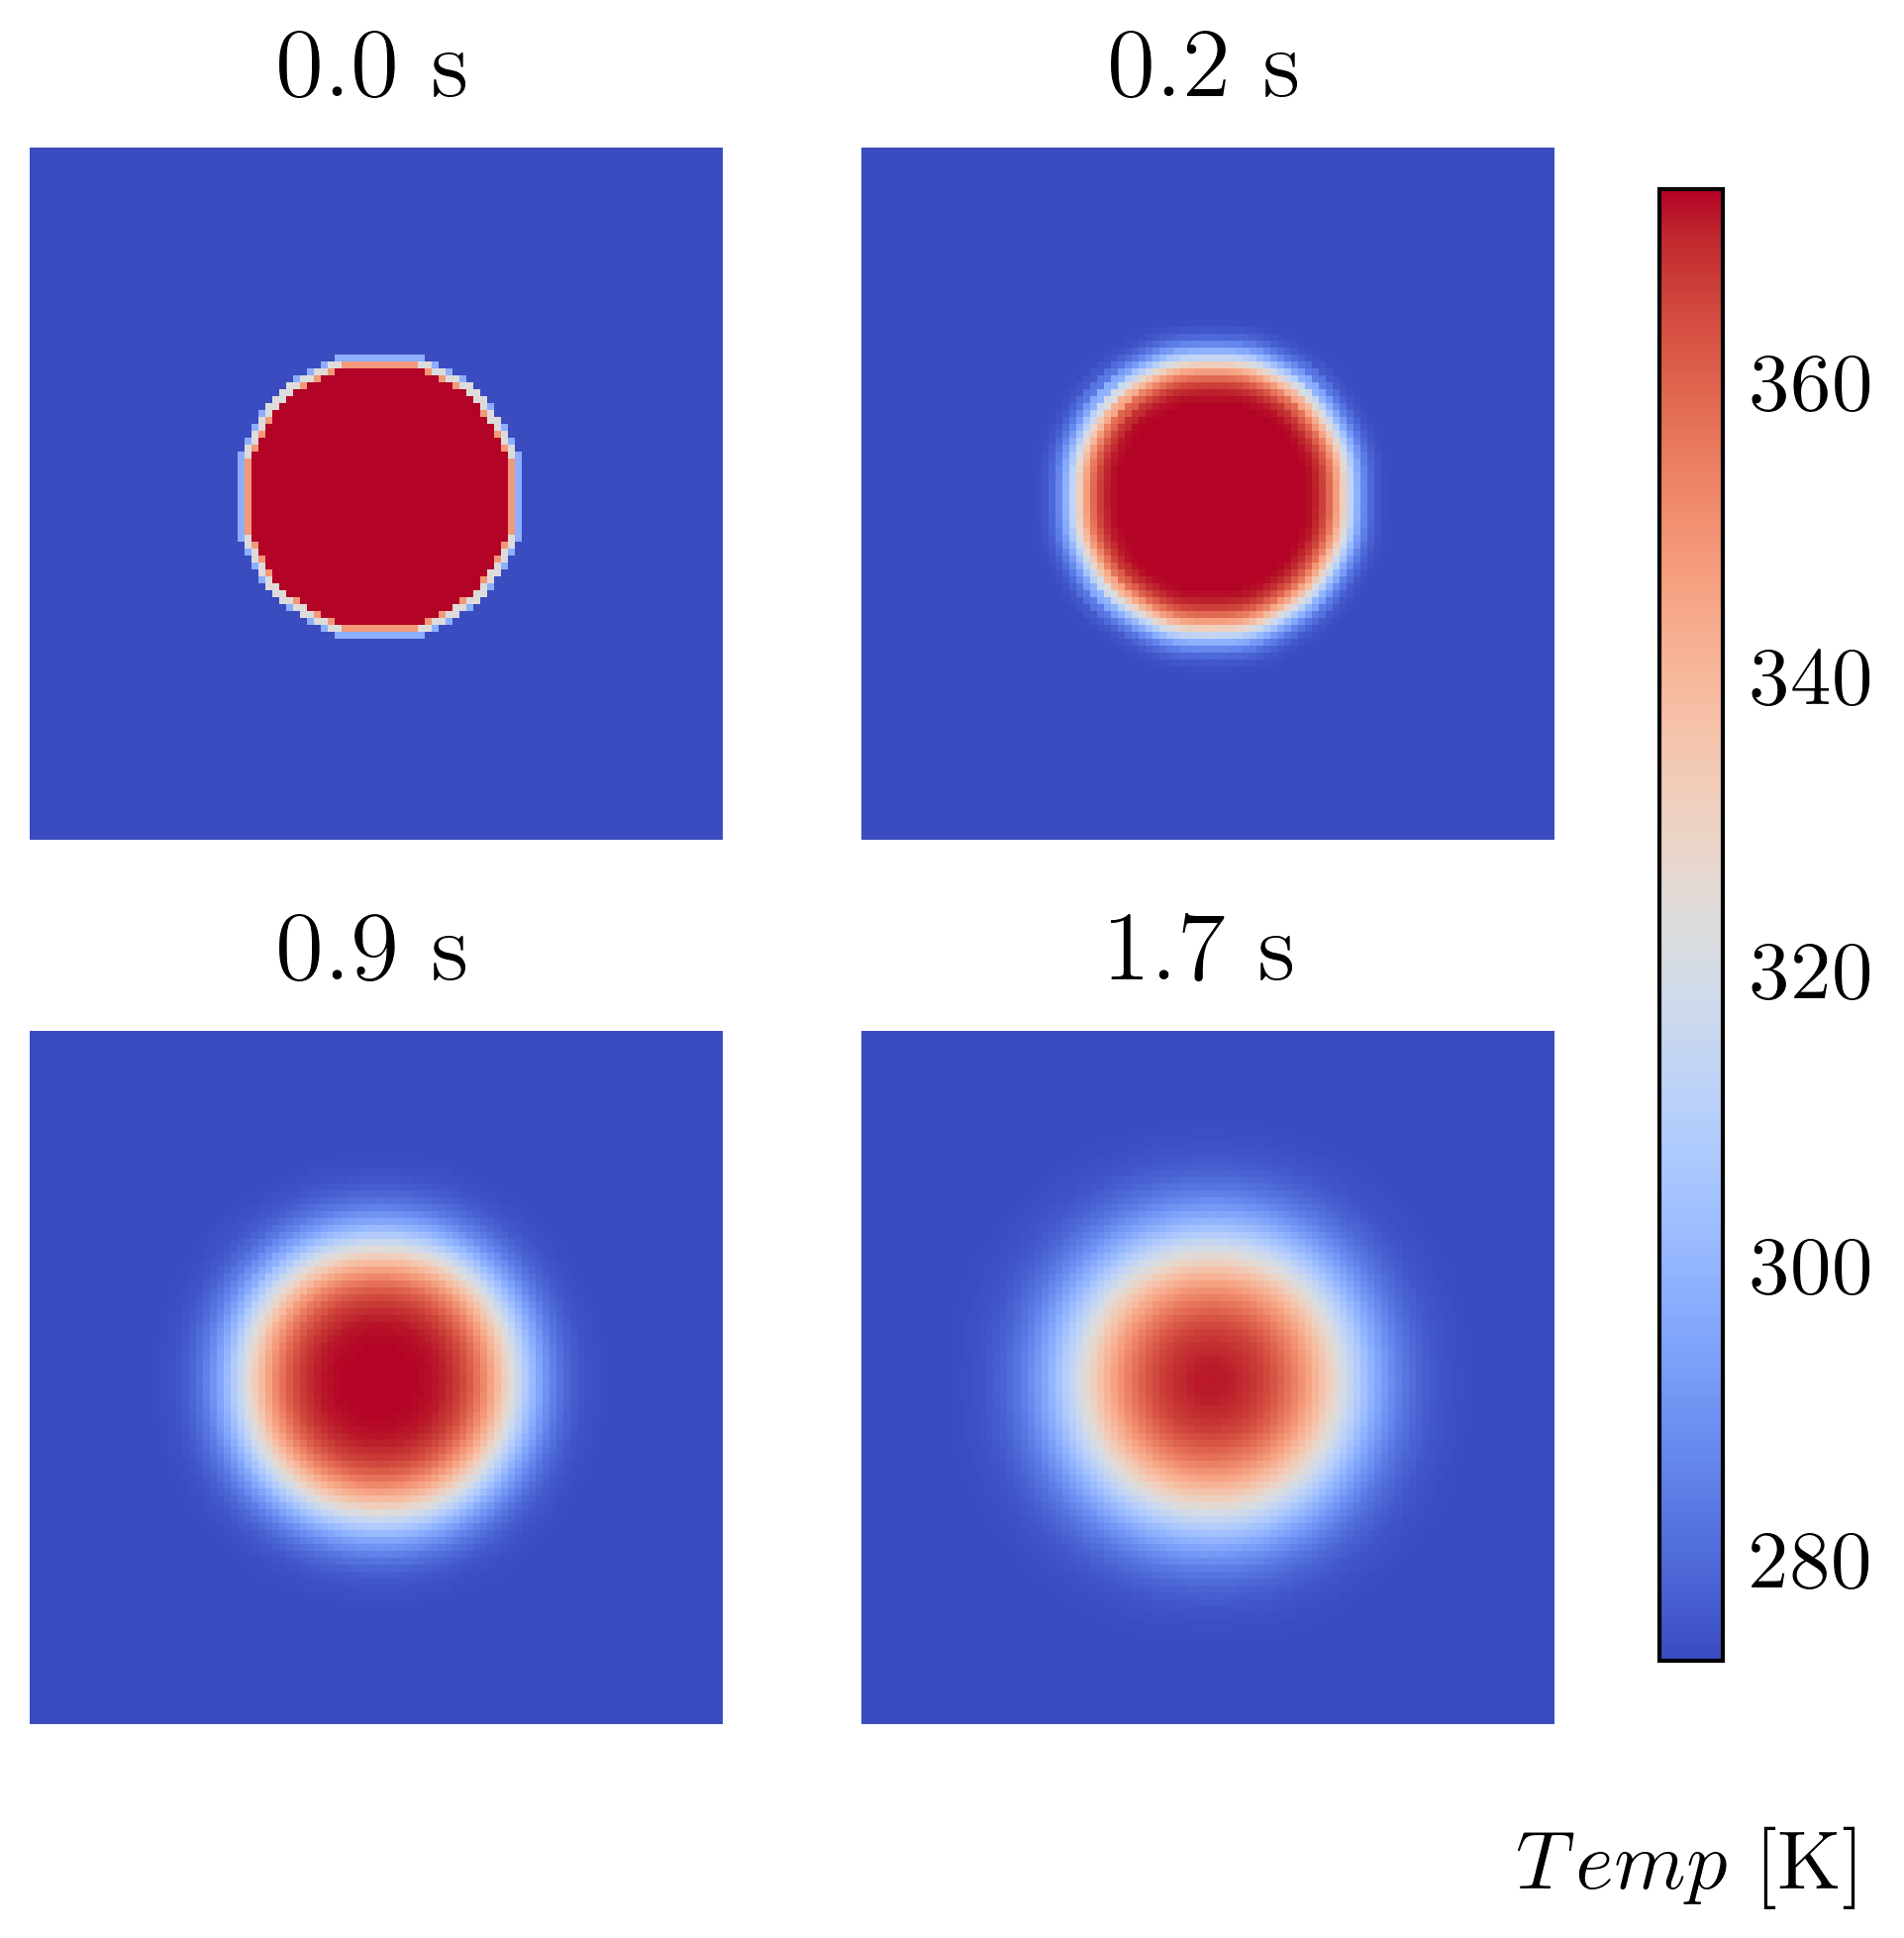

In [ ]:
#Check with again because the top was mehhhhh

# plate size, mm
w = h = 10.

dx = dy = 0.1
D = 0.143

Tcold, Thot = 273.15, 373.15

nx, ny = int(w/dx), int(h/dy)

dx2, dy2 = dx*dx, dy*dy
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

u0 = Tcold * np.ones((nx, ny))
u = u0.copy()

r, cx, cy = 2, 5, 5
r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 < r2:
            u0[i,j] = Thot


u0[0, :] = u0[-1, :] = u0[:, 0] = u0[:, -1] = Tcold
u[0, :] = u[-1, :] = u[:, 0] = u[:, -1] = Tcold

def do_timestep(u0, u):
    # let's try with forward-difference in time, central-difference in space ehgdkjhajkdhgfkadf
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )
    u[0, :] = u[-1, :] = u[:, 0] = u[:, -1] = Tcold

    u0 = u.copy()
    return u0, u

nsteps = 101
mfig = [0, 10, 50, 100]
fignum = 0

fig = plt.figure(figsize=(3.54,3.54), dpi=600)
# plt.figure(figsize=(10,6))
# plt.figure(figsize=(10,3.54), dpi=600)
for m in range(nsteps):
    u0, u = do_timestep(u0, u)
    if m in mfig:
        fignum += 1
        print(m, fignum)
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(u.copy(), cmap=plt.get_cmap('coolwarm'), vmin=Tcold,vmax=Thot)
        ax.set_axis_off()
        ax.set_title('{:.1f} s'.format(m*dt))
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$Temp$ [K]', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
fig = plt.savefig('th_water.png', bbox_inches='tight')
plt.show()


## Part 3

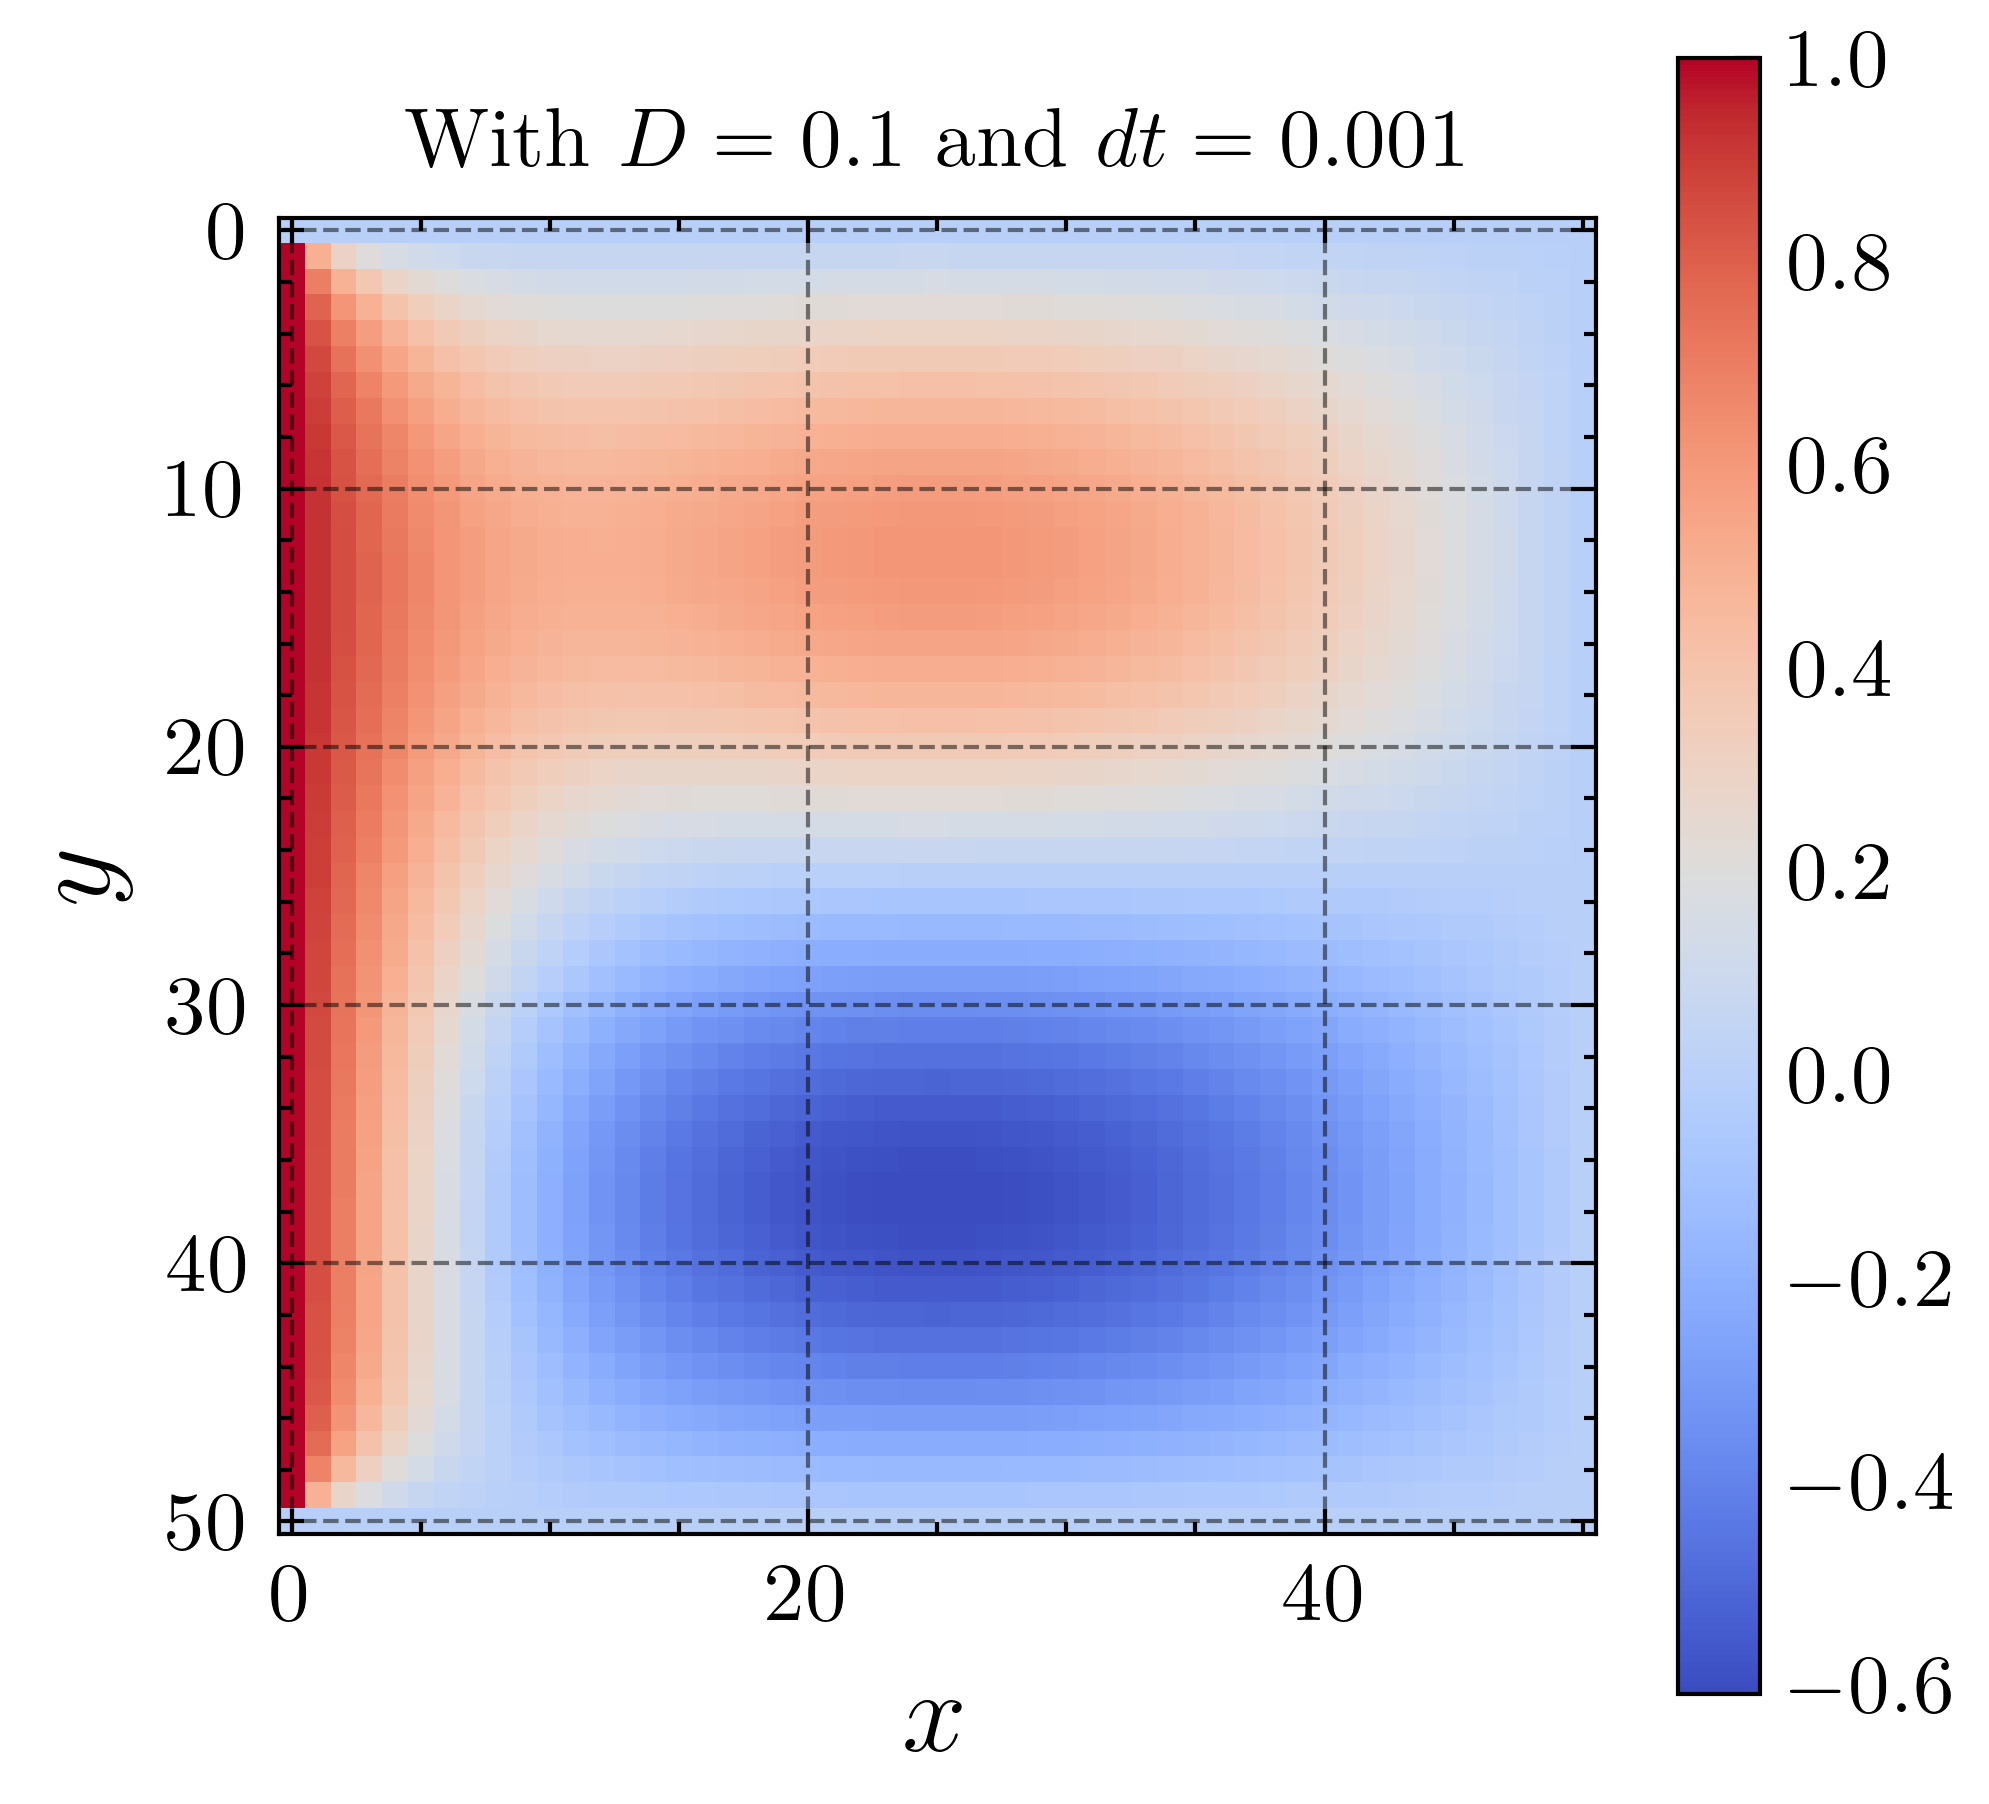

In [ ]:

Lx, Ly = 1.0, 1.0  
Nx, Ny = 50, 50   

# lemme try static diffusion coefficient and time step
D = 0.1      
dt = 0.001   


bc_left = 1.0  
bc_right = 0.0 
bc_top = 0.0 
bc_bottom = 0.0 

def initial_condition(x, y):
    return np.sin(np.pi * x) * np.sin(2 * np.pi * y)

x = np.linspace(0, Lx, Nx+1)
y = np.linspace(0, Ly, Ny+1)
dx = x[1] - x[0]
dy = y[1] - y[0]
X, Y = np.meshgrid(x, y)

U = np.zeros((Nx+1, Ny+1))
U[:, 0] = bc_left
U[:, -1] = bc_right
U[0, :] = bc_bottom
U[-1, :] = bc_top
U[1:Nx, 1:Ny] = initial_condition(X[1:Nx, 1:Ny], Y[1:Nx, 1:Ny])

for i in range(100):
    U[1:Nx, 1:Ny] += D * dt * (
        (U[2:Nx+1, 1:Ny] - 2 * U[1:Nx, 1:Ny] + U[0:Nx-1, 1:Ny]) / dx**2
        + (U[1:Nx, 2:Ny+1] - 2 * U[1:Nx, 1:Ny] + U[1:Nx, 0:Ny-1]) / dy**2)
    
plt.figure(figsize=(3.54,3.54), dpi=600)
plt.imshow(U, cmap='coolwarm')
plt.colorbar()
plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$y$', fontsize=14)
plt.title(r'With $D=0.1$ and $dt=0.001$', fontsize=10)
plt.savefig('0.1_time.png', bbox_inches='tight')
plt.show()


## Par 4.hello there ...general obi won kenobi

In [6]:

# Define the parameters of the problem
Lx = 1.0
Ly = 1.0
nx = 50
ny = 50
dx = Lx/nx
dy = Ly/ny
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)

# X, Y = np.meshgrid(x, y, indexing='ij')
# D_values = [0.1, 0.2, 0.3, 0.4]

# T_top = np.zeros(nx)
# T_bottom = np.zeros(nx)
# T_left = np.zeros(ny)
# T_right = np.zeros(ny)

X, Y = np.meshgrid(x, y, indexing='ij')
D_values = [0.1, 0.2, 0.3, 0.4]

T_top = np.zeros(nx)
T_bottom = np.zeros(nx)
T_left = np.zeros(ny)
T_right = np.zeros(ny)

def diffusivity(x, y):
    if x < Lx/2 and y < Ly/2:
        return D_values[0]
    elif x >= Lx/2 and y < Ly/2:
        return D_values[1]
    elif x < Lx/2 and y >= Ly/2:
        return D_values[2]
    else:
        return D_values[3]

def rhs(x, y):
    return np.zeros_like(x)

def boundary(x, y):
    return np.concatenate((T_top, T_bottom, T_left, T_right), axis=None)

In [7]:
#PaiNN 
model = Sequential()
model.add(Dense(32, activation='tanh', input_shape=(2,)))
model.add(Dense(64, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(256, activation='tanh'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(1, activation=None))

######## ive adpated a couple of lines from our class
def pinn_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred))

optimizer = RMSprop(learning_rate=1e-3)

# summing in either way or compilising PiNN model
model.compile(loss=pinn_loss, optimizer=optimizer)

#train
X_train = np.concatenate((X.reshape(-1, 1), Y.reshape(-1, 1)), axis=1)
Y_train = np.zeros_like(X_train[:, 0])
model.fit(X_train, Y_train, epochs=500, batch_size=1024, verbose=0)

79/79 [==============================] - 0s 2ms/step


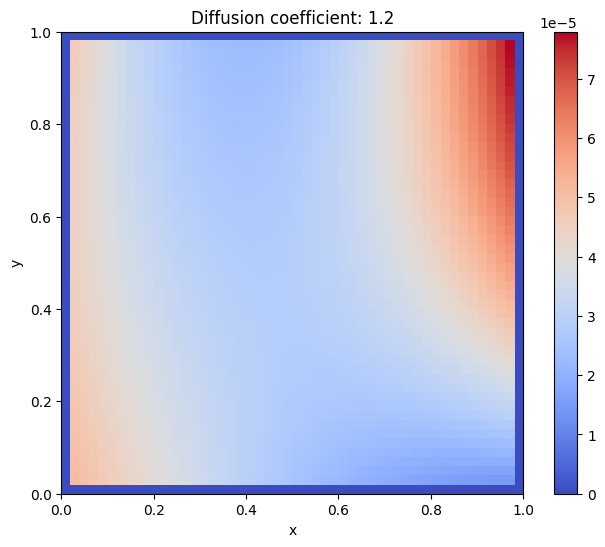

79/79 [==============================] - 0s 2ms/step


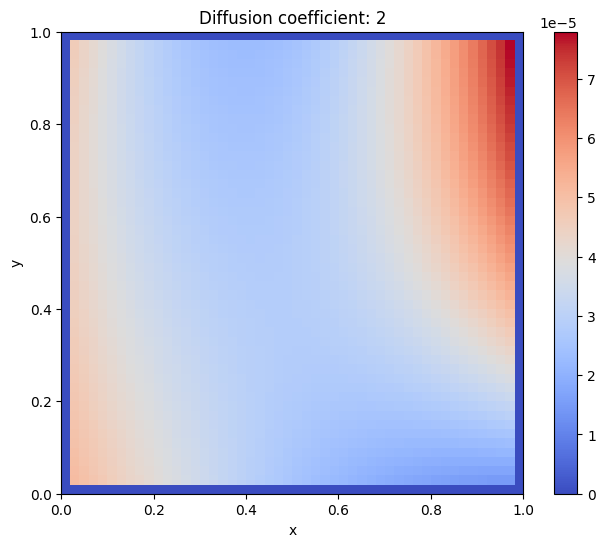

79/79 [==============================] - 0s 2ms/step


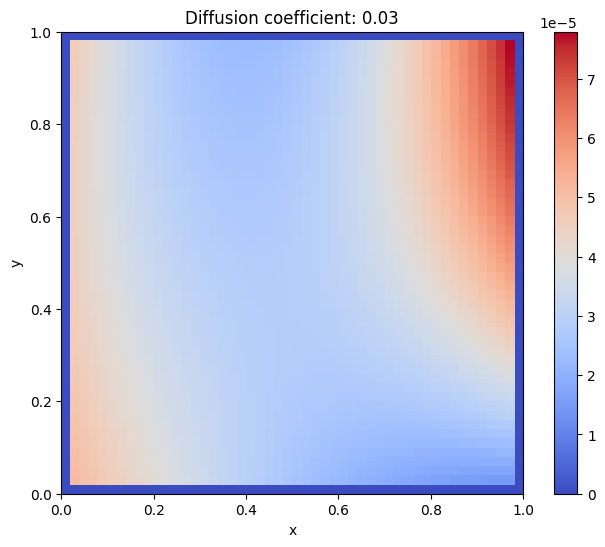

79/79 [==============================] - 0s 2ms/step


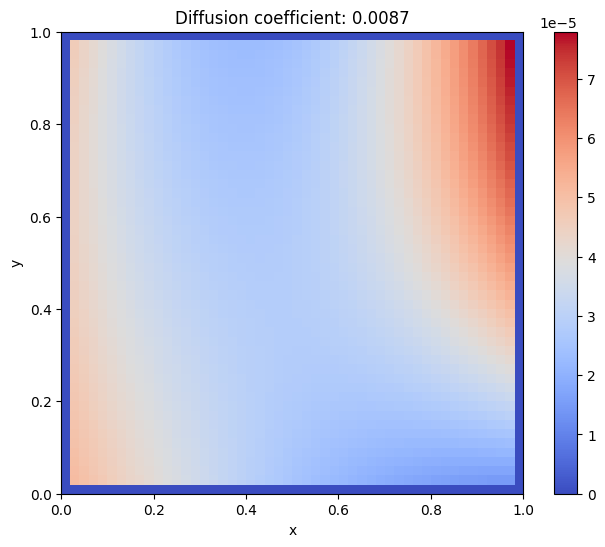

In [9]:

D_values = [1.2, 2, 0.03, 0.0087]
for D in D_values:
    def diffusivity(x, y):
        return D
    X, Y = np.meshgrid(np.linspace(0, Lx, nx), np.linspace(0, Ly, ny))
    X_star = np.concatenate((X.reshape(-1, 1), Y.reshape(-1, 1)), axis=1)
    T_star = model.predict(X_star)
    # tstar = model.train(X_star) ......
    # t= T_star.reshape((nx, nx))
    T = T_star.reshape((nx, ny))
    T[:, 0] = T_top
    T[:, -1] = T_bottom
    T[0, :] = T_left
    T[-1, :] = T_right

    plt.figure(figsize=(8, 6))
    plt.imshow(T.T, origin='lower', extent=[0, Lx, 0, Ly], cmap='coolwarm')
    plt.colorbar()
    plt.title(f'Diffusion coefficient: {D}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

## part 5

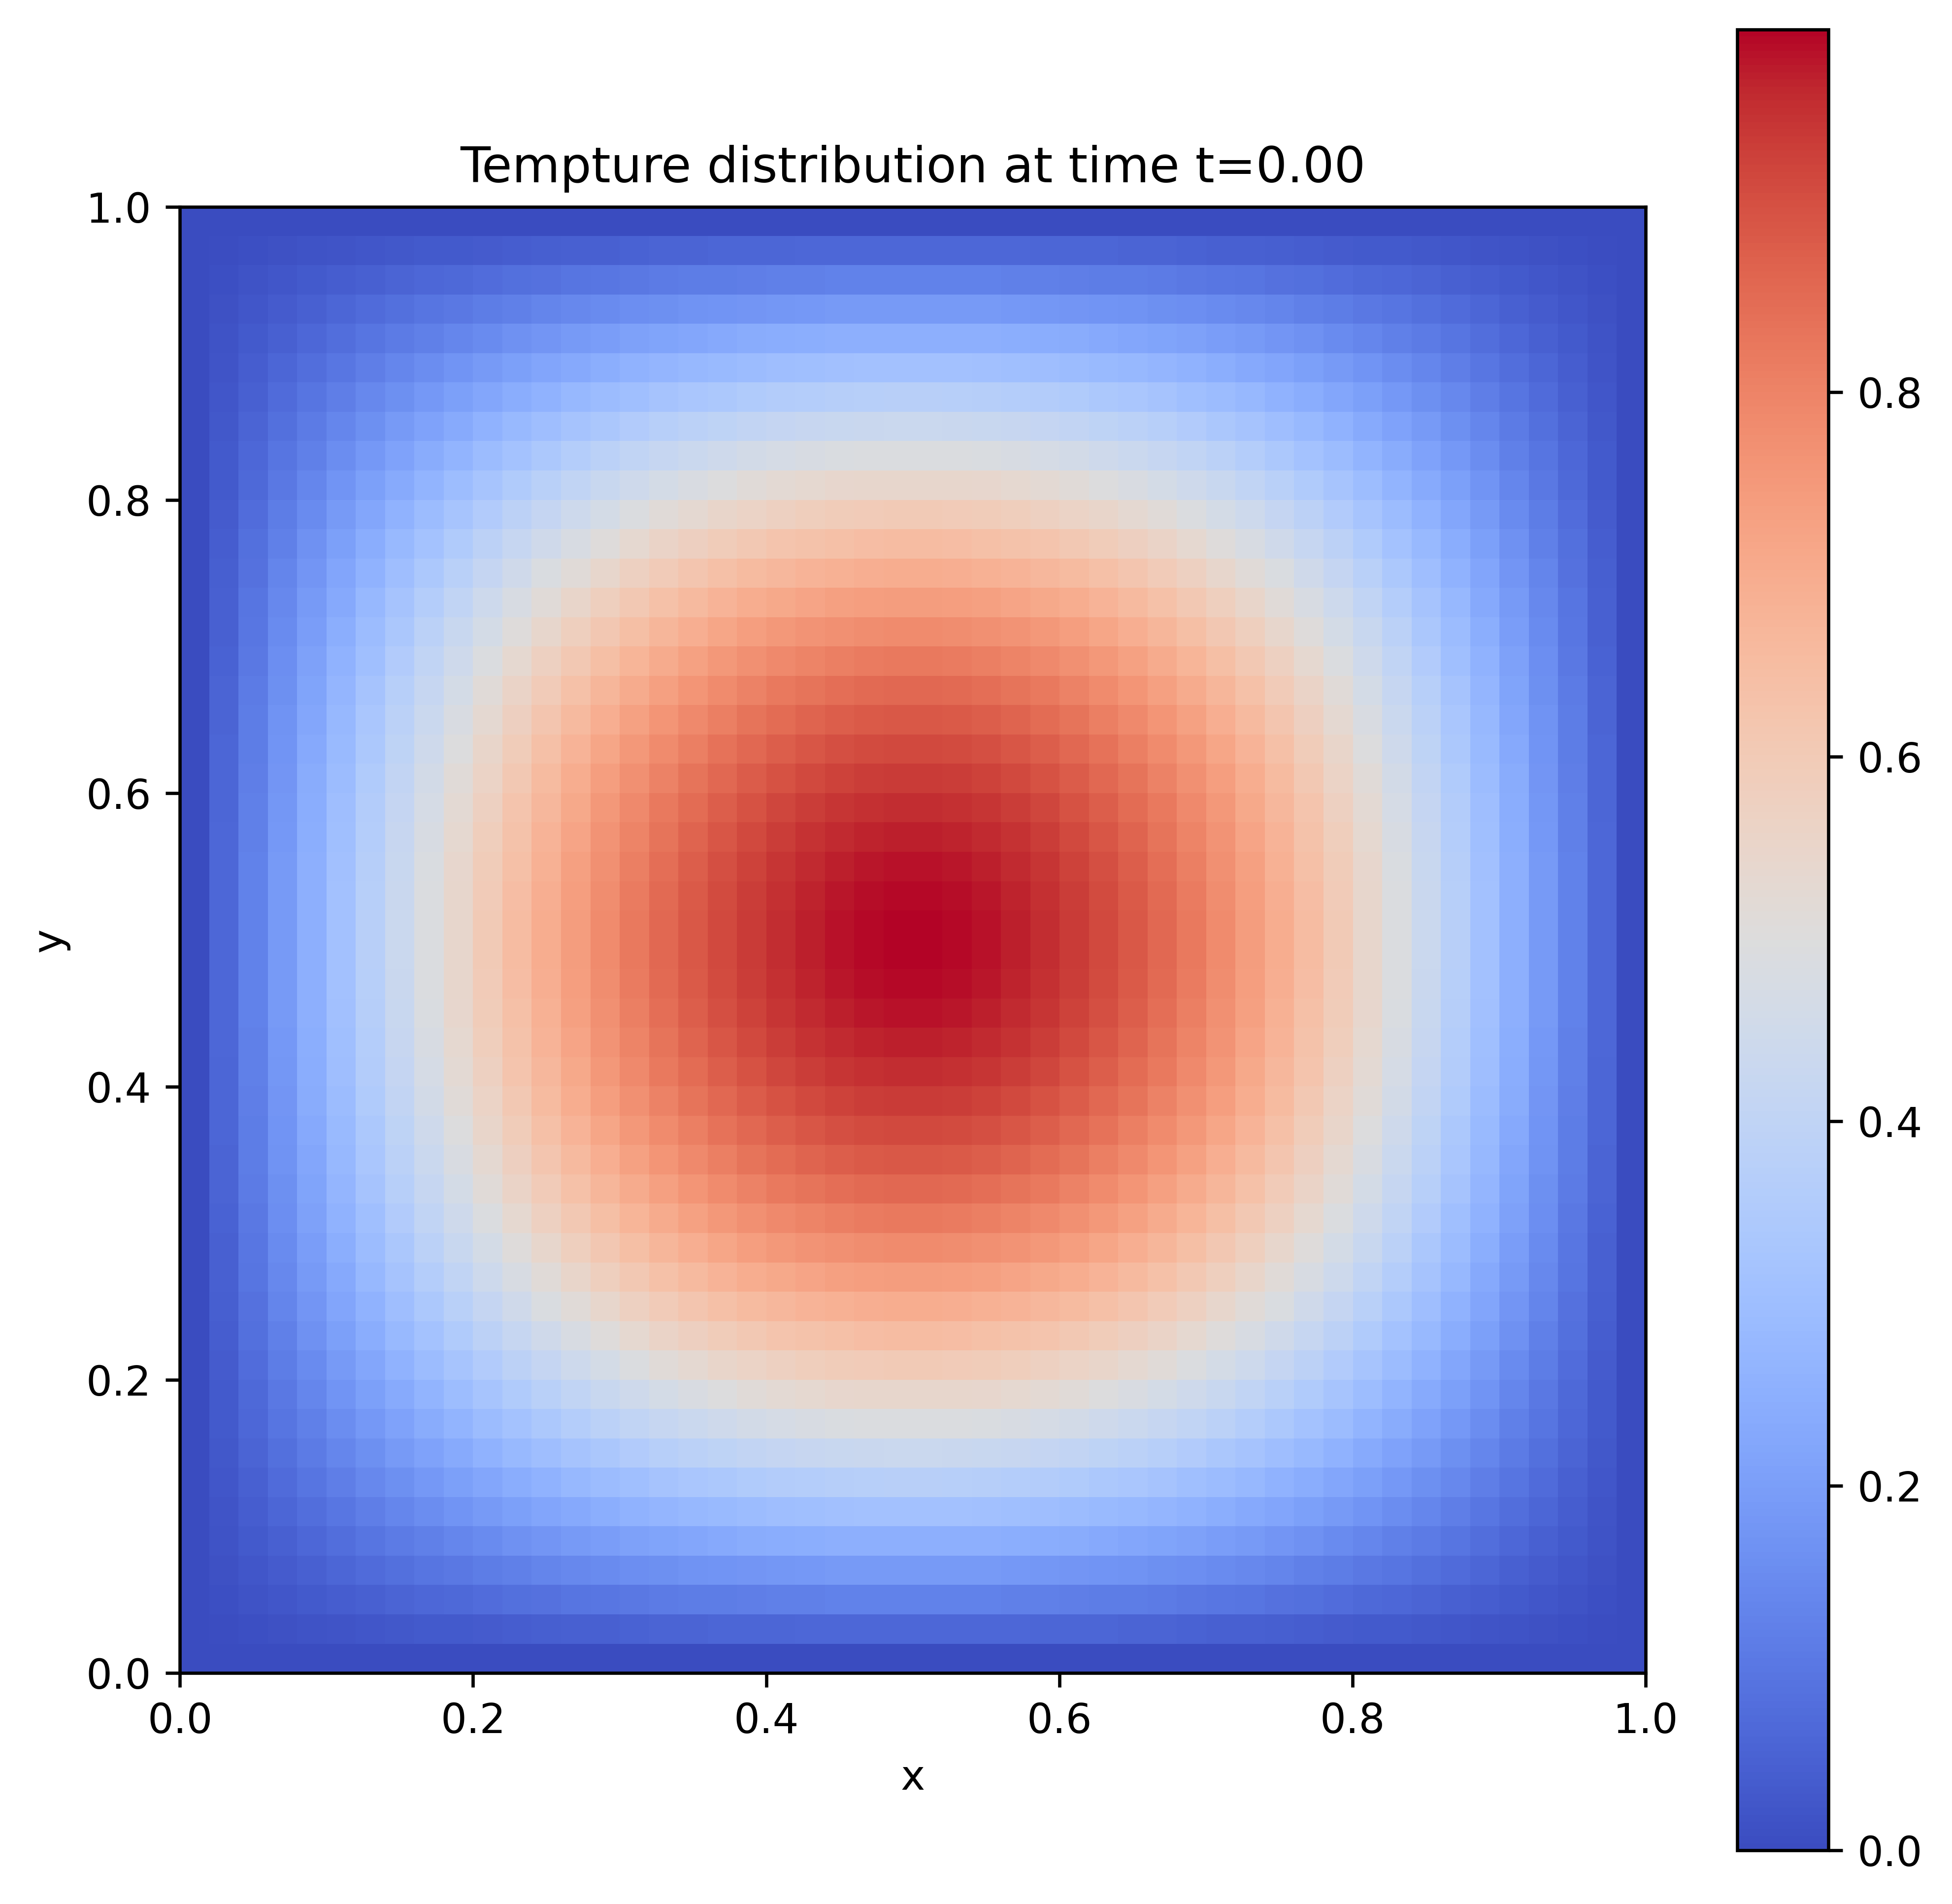

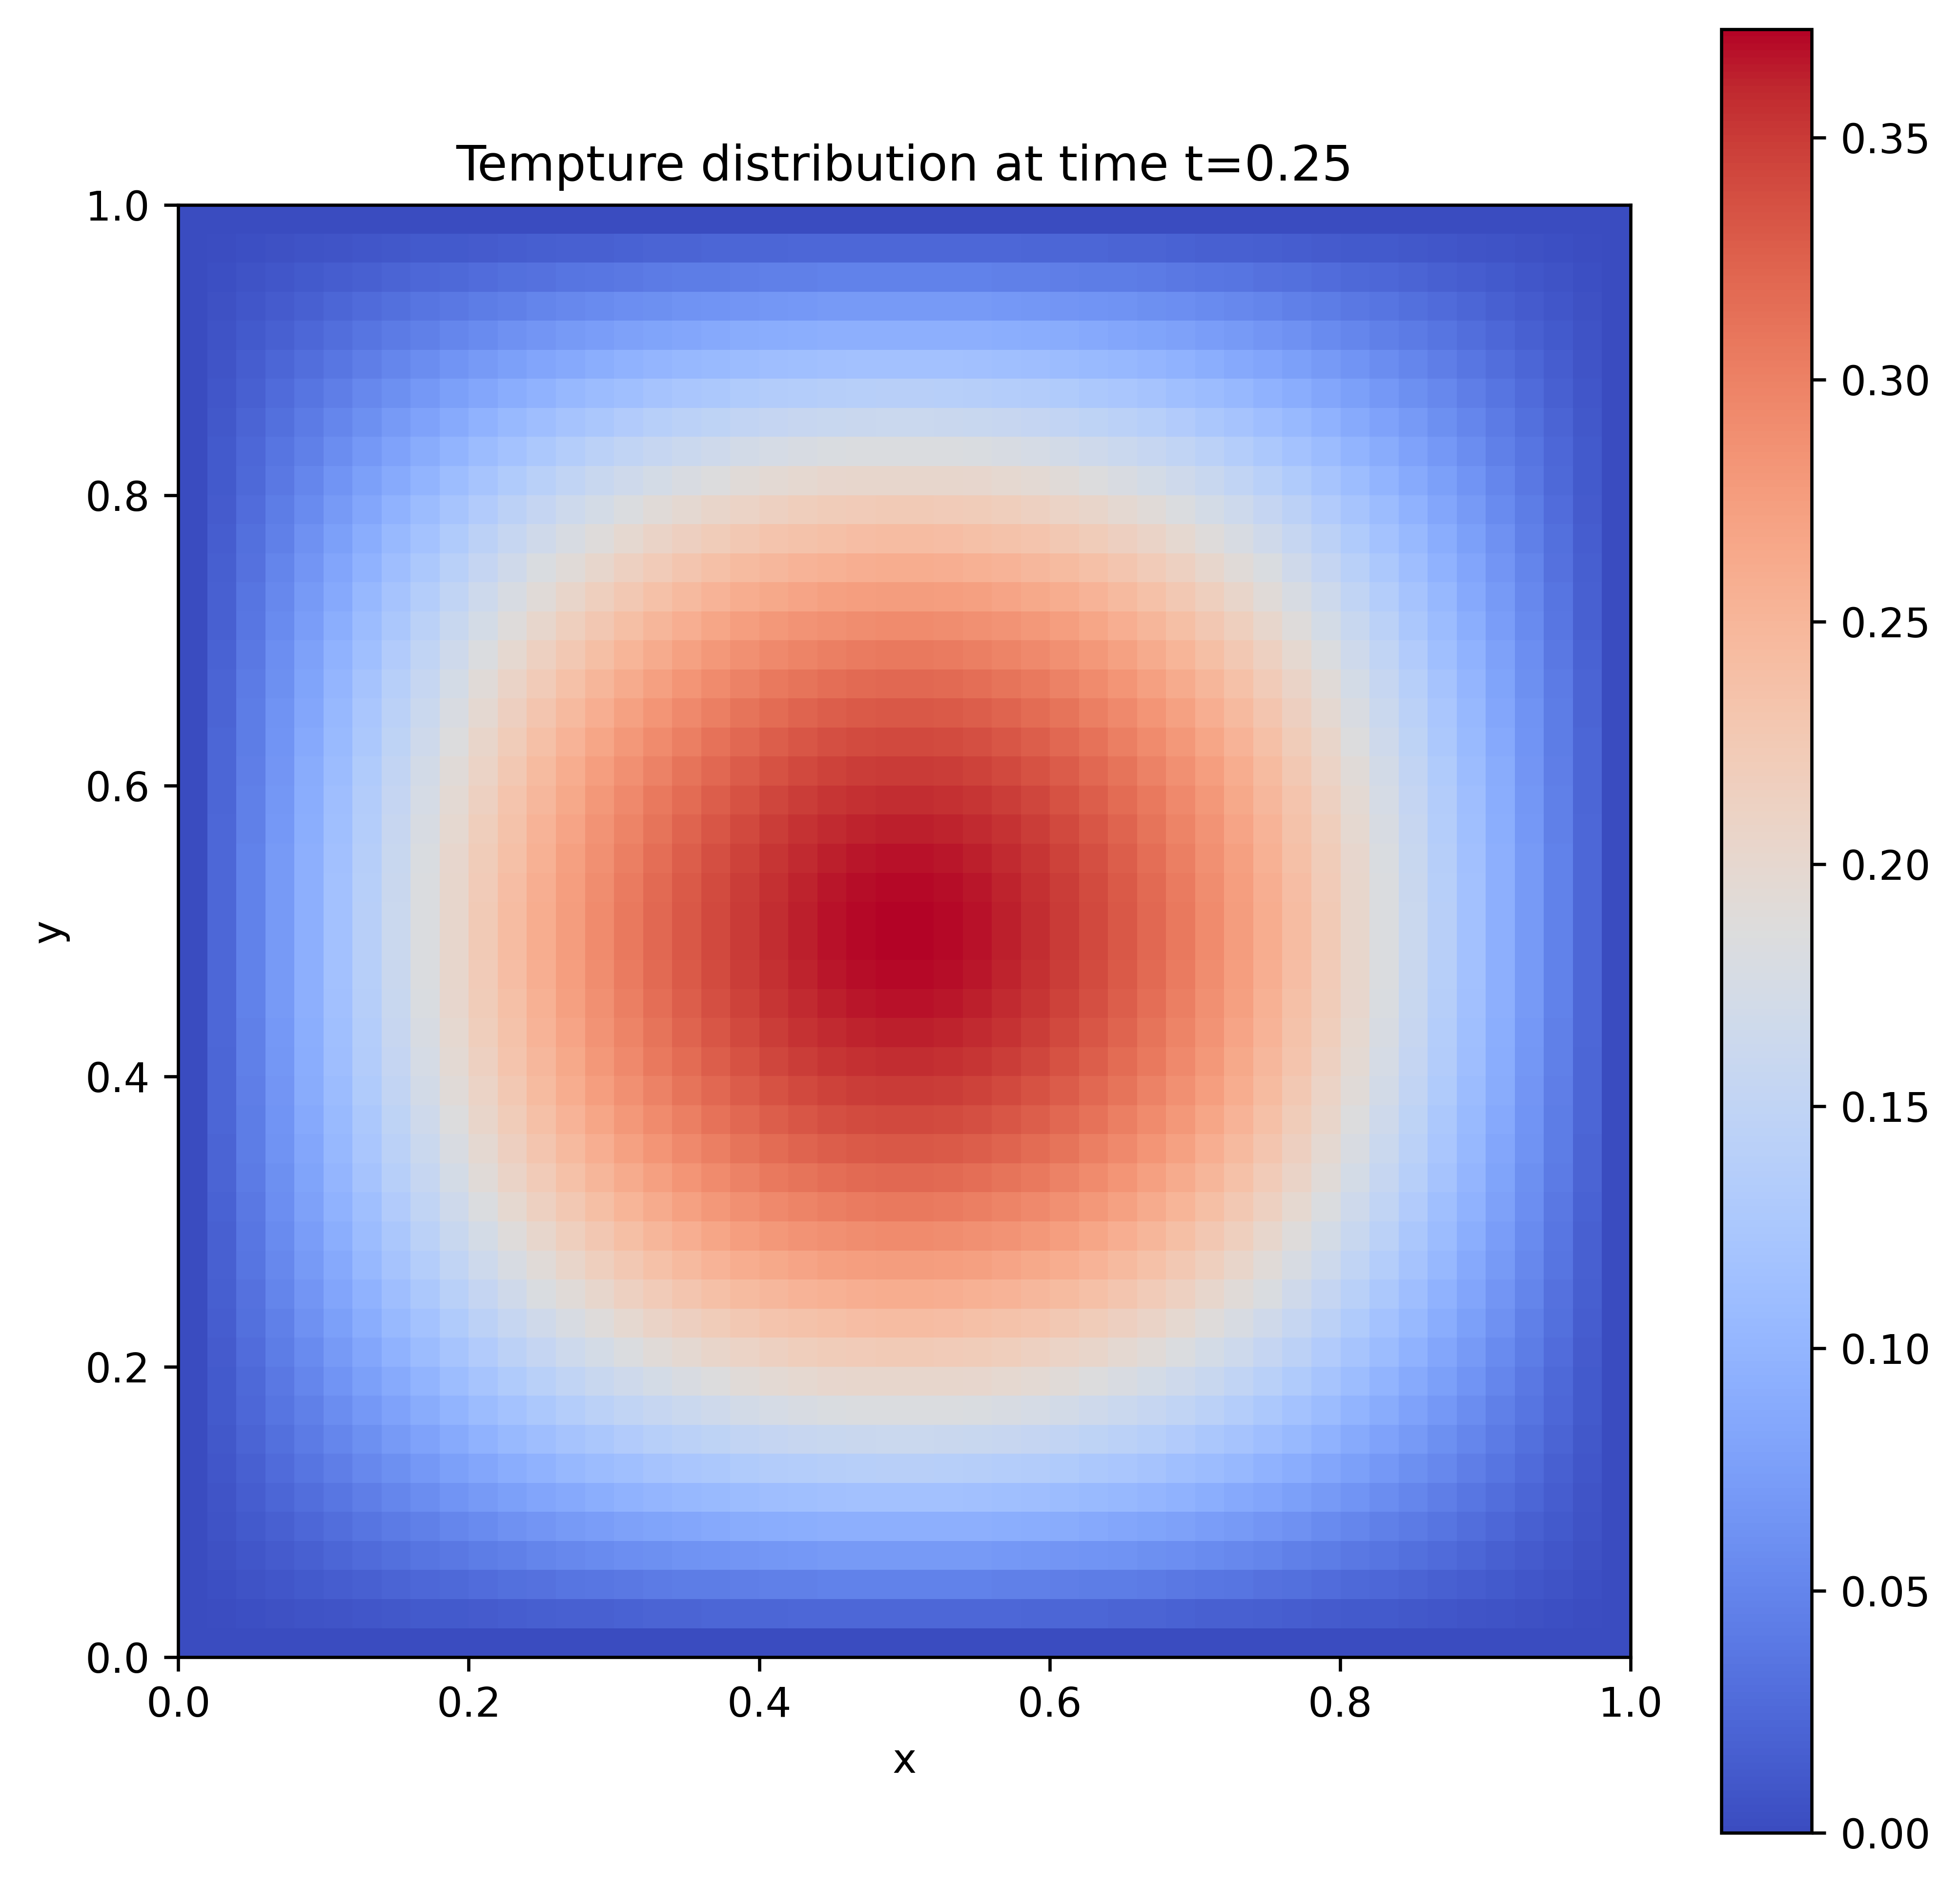

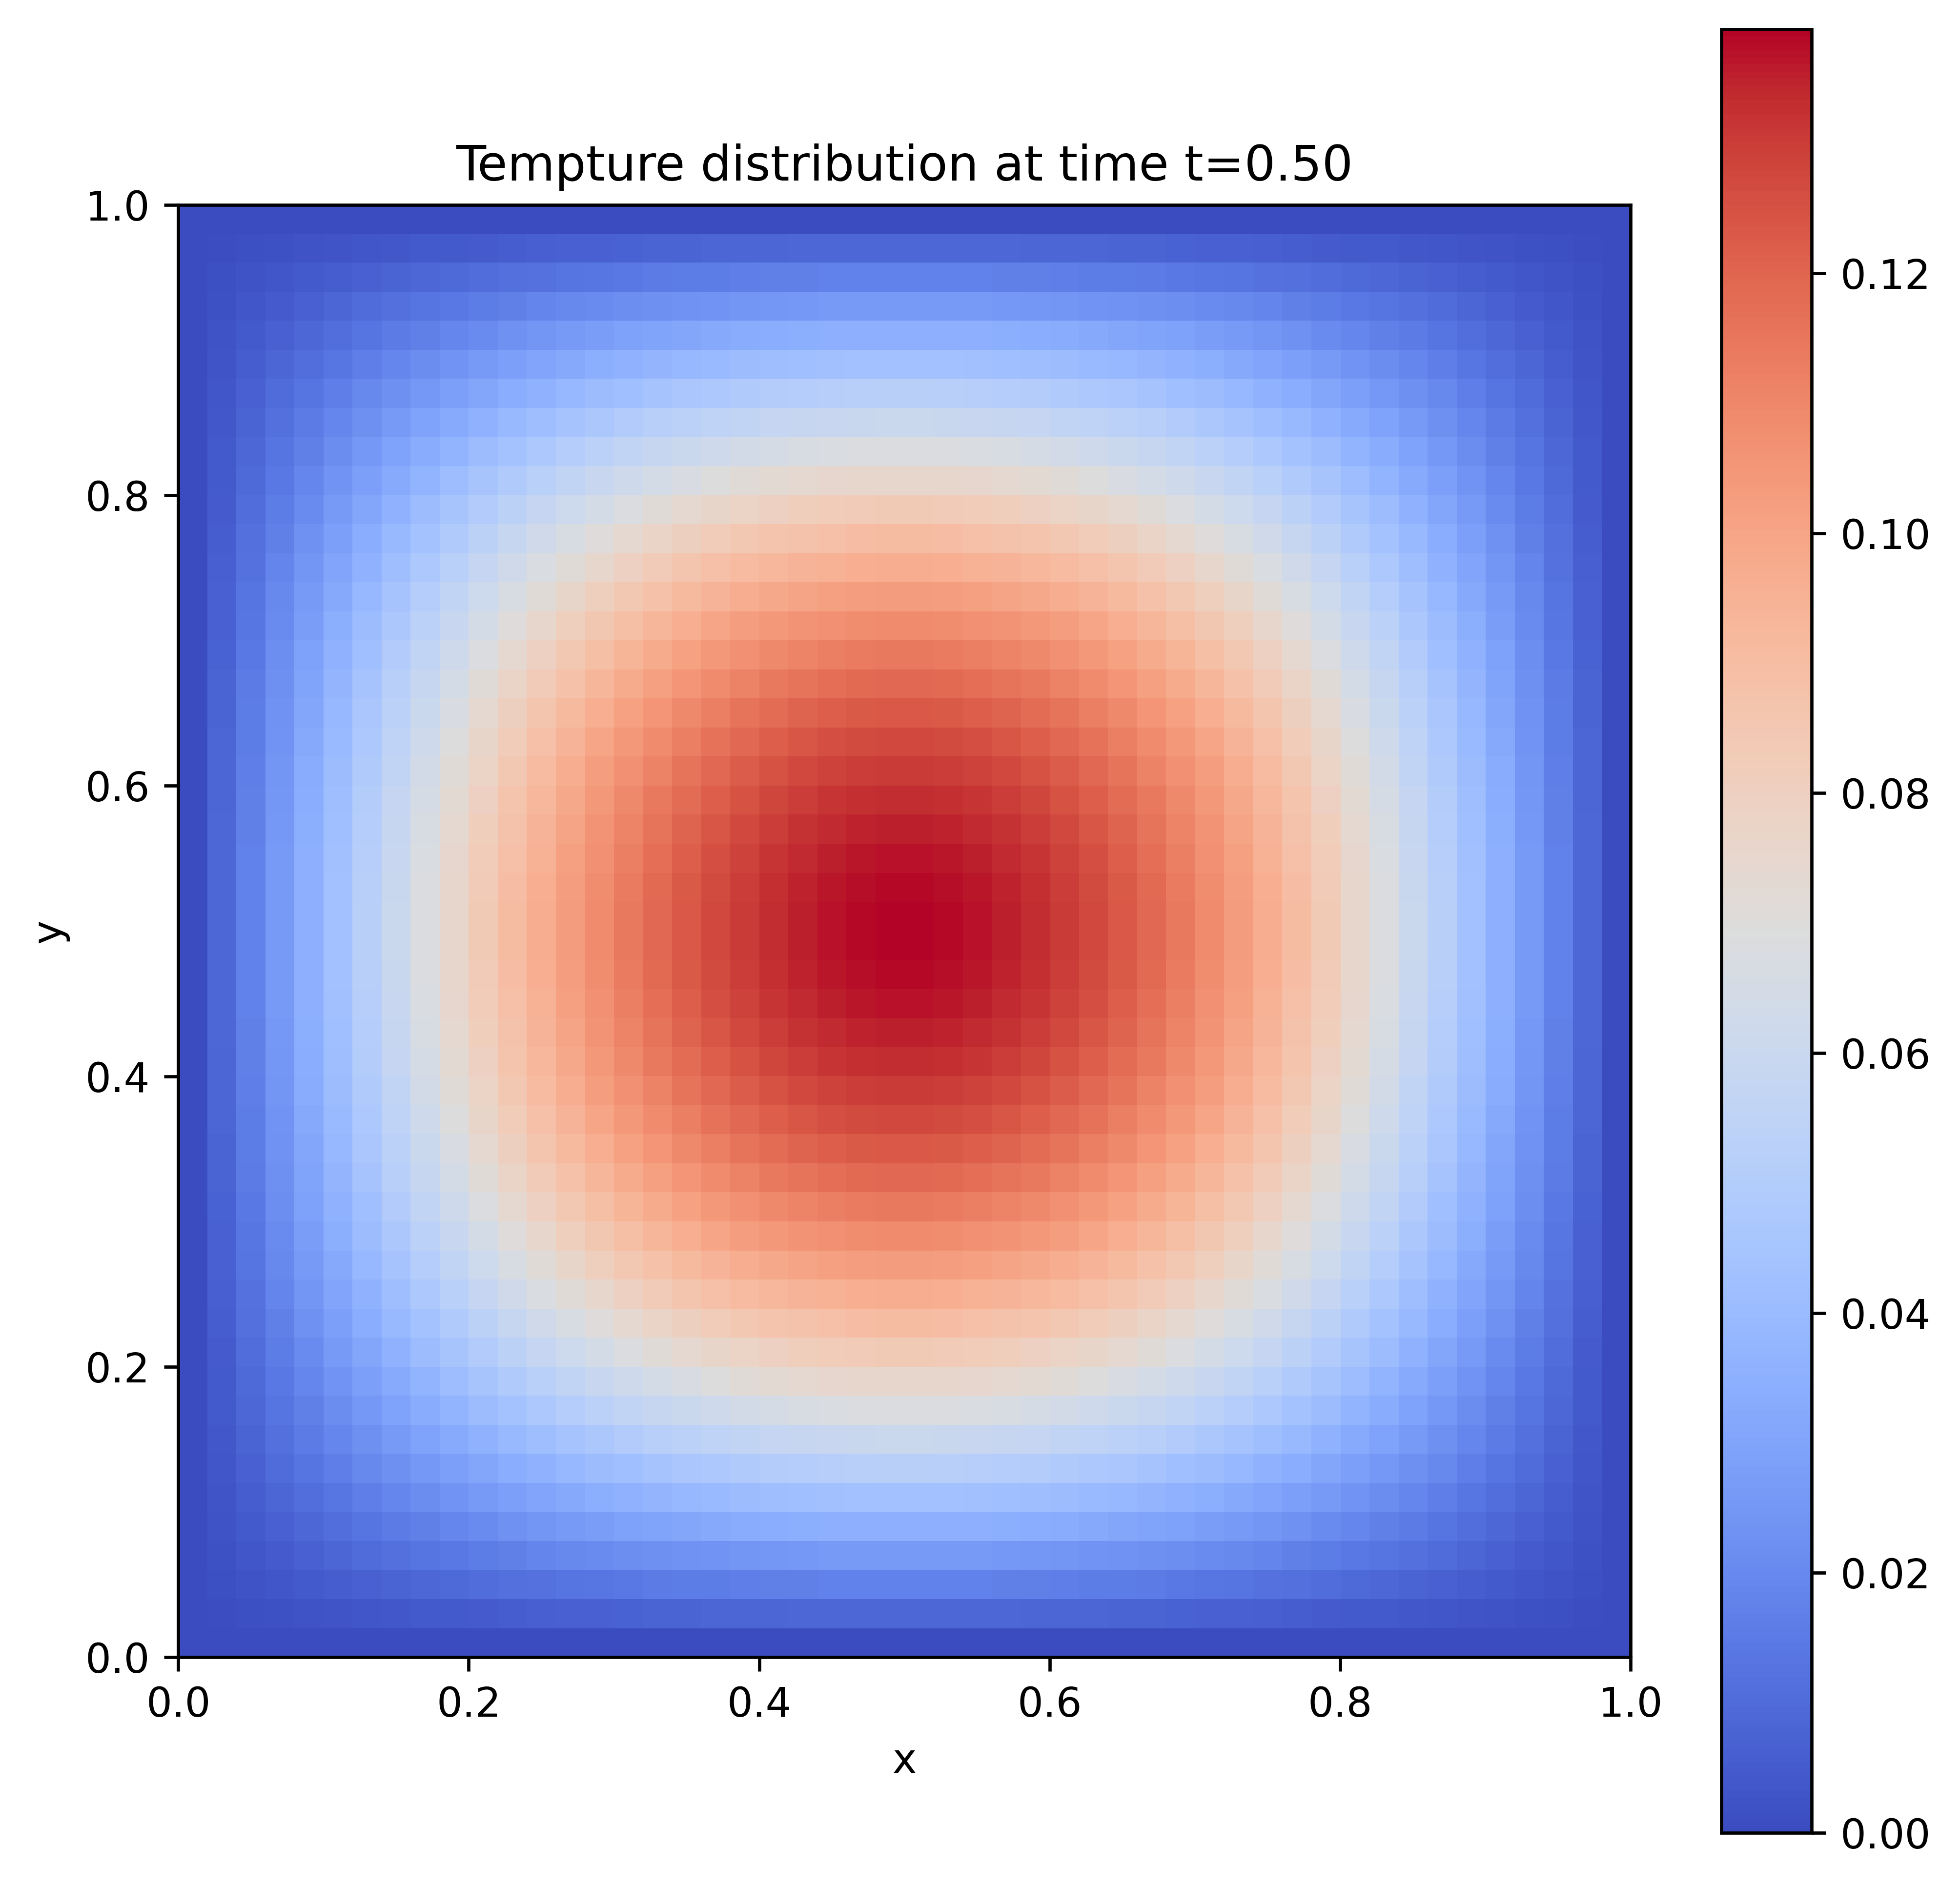

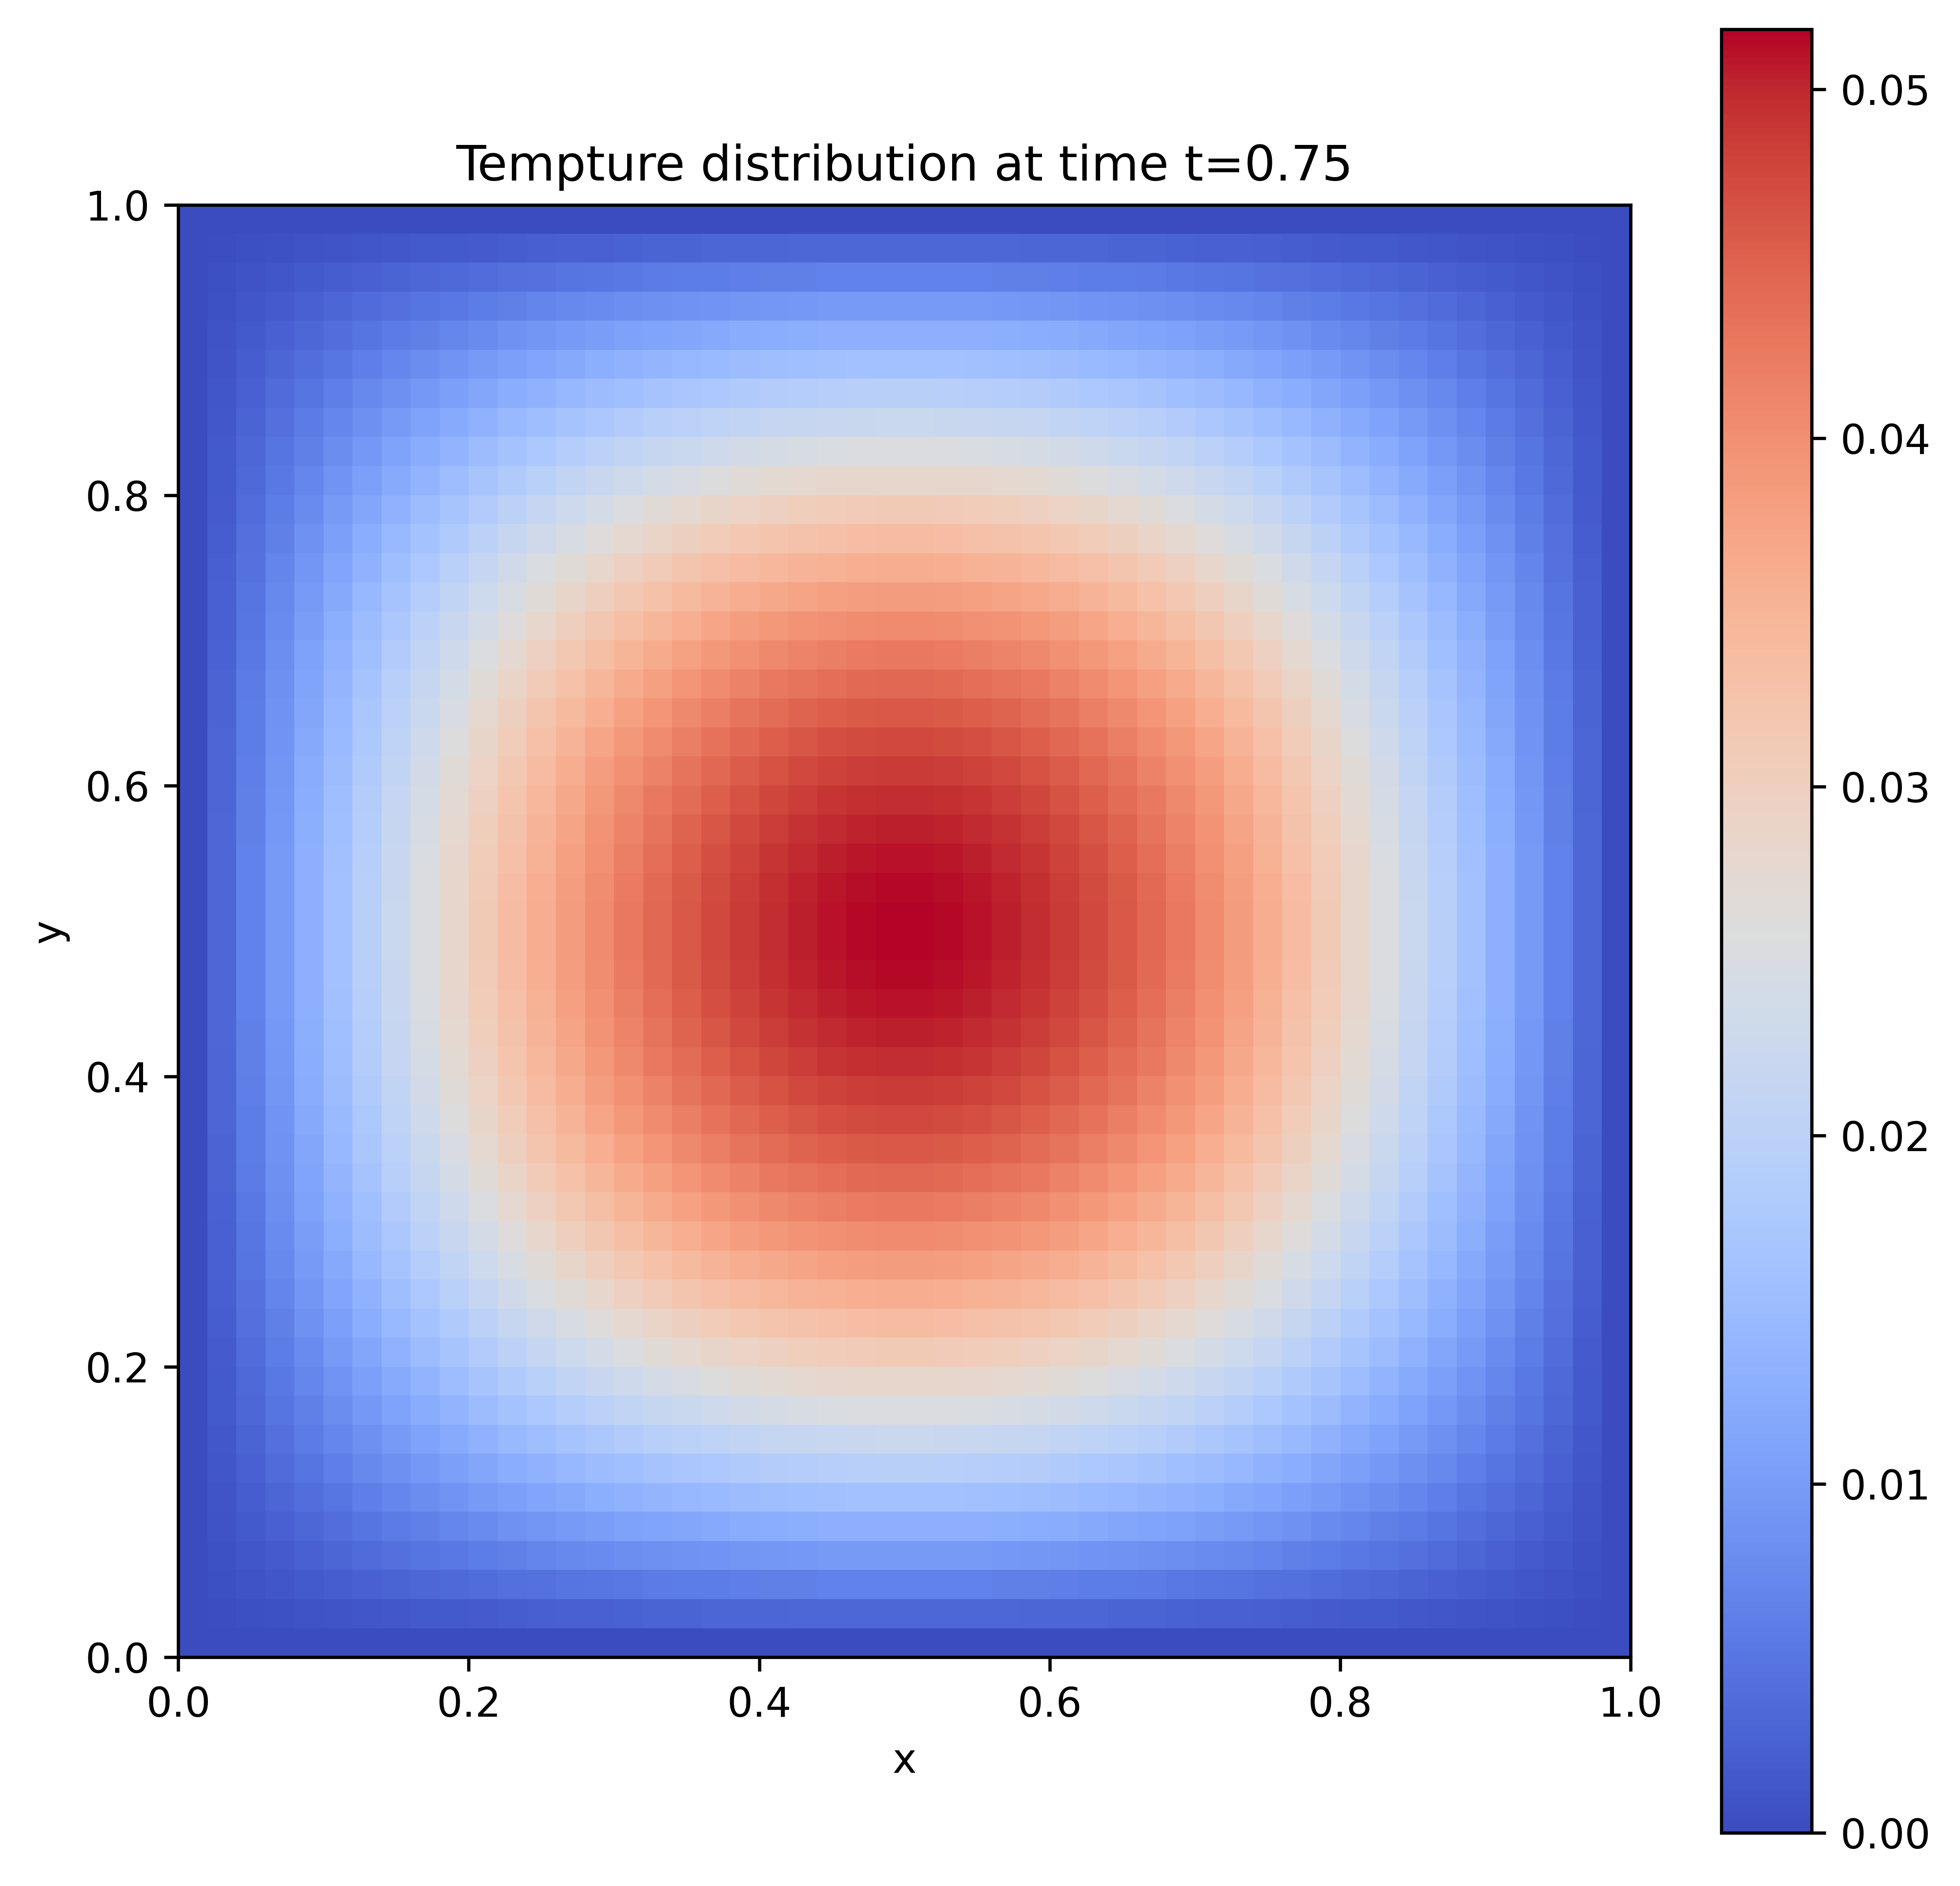

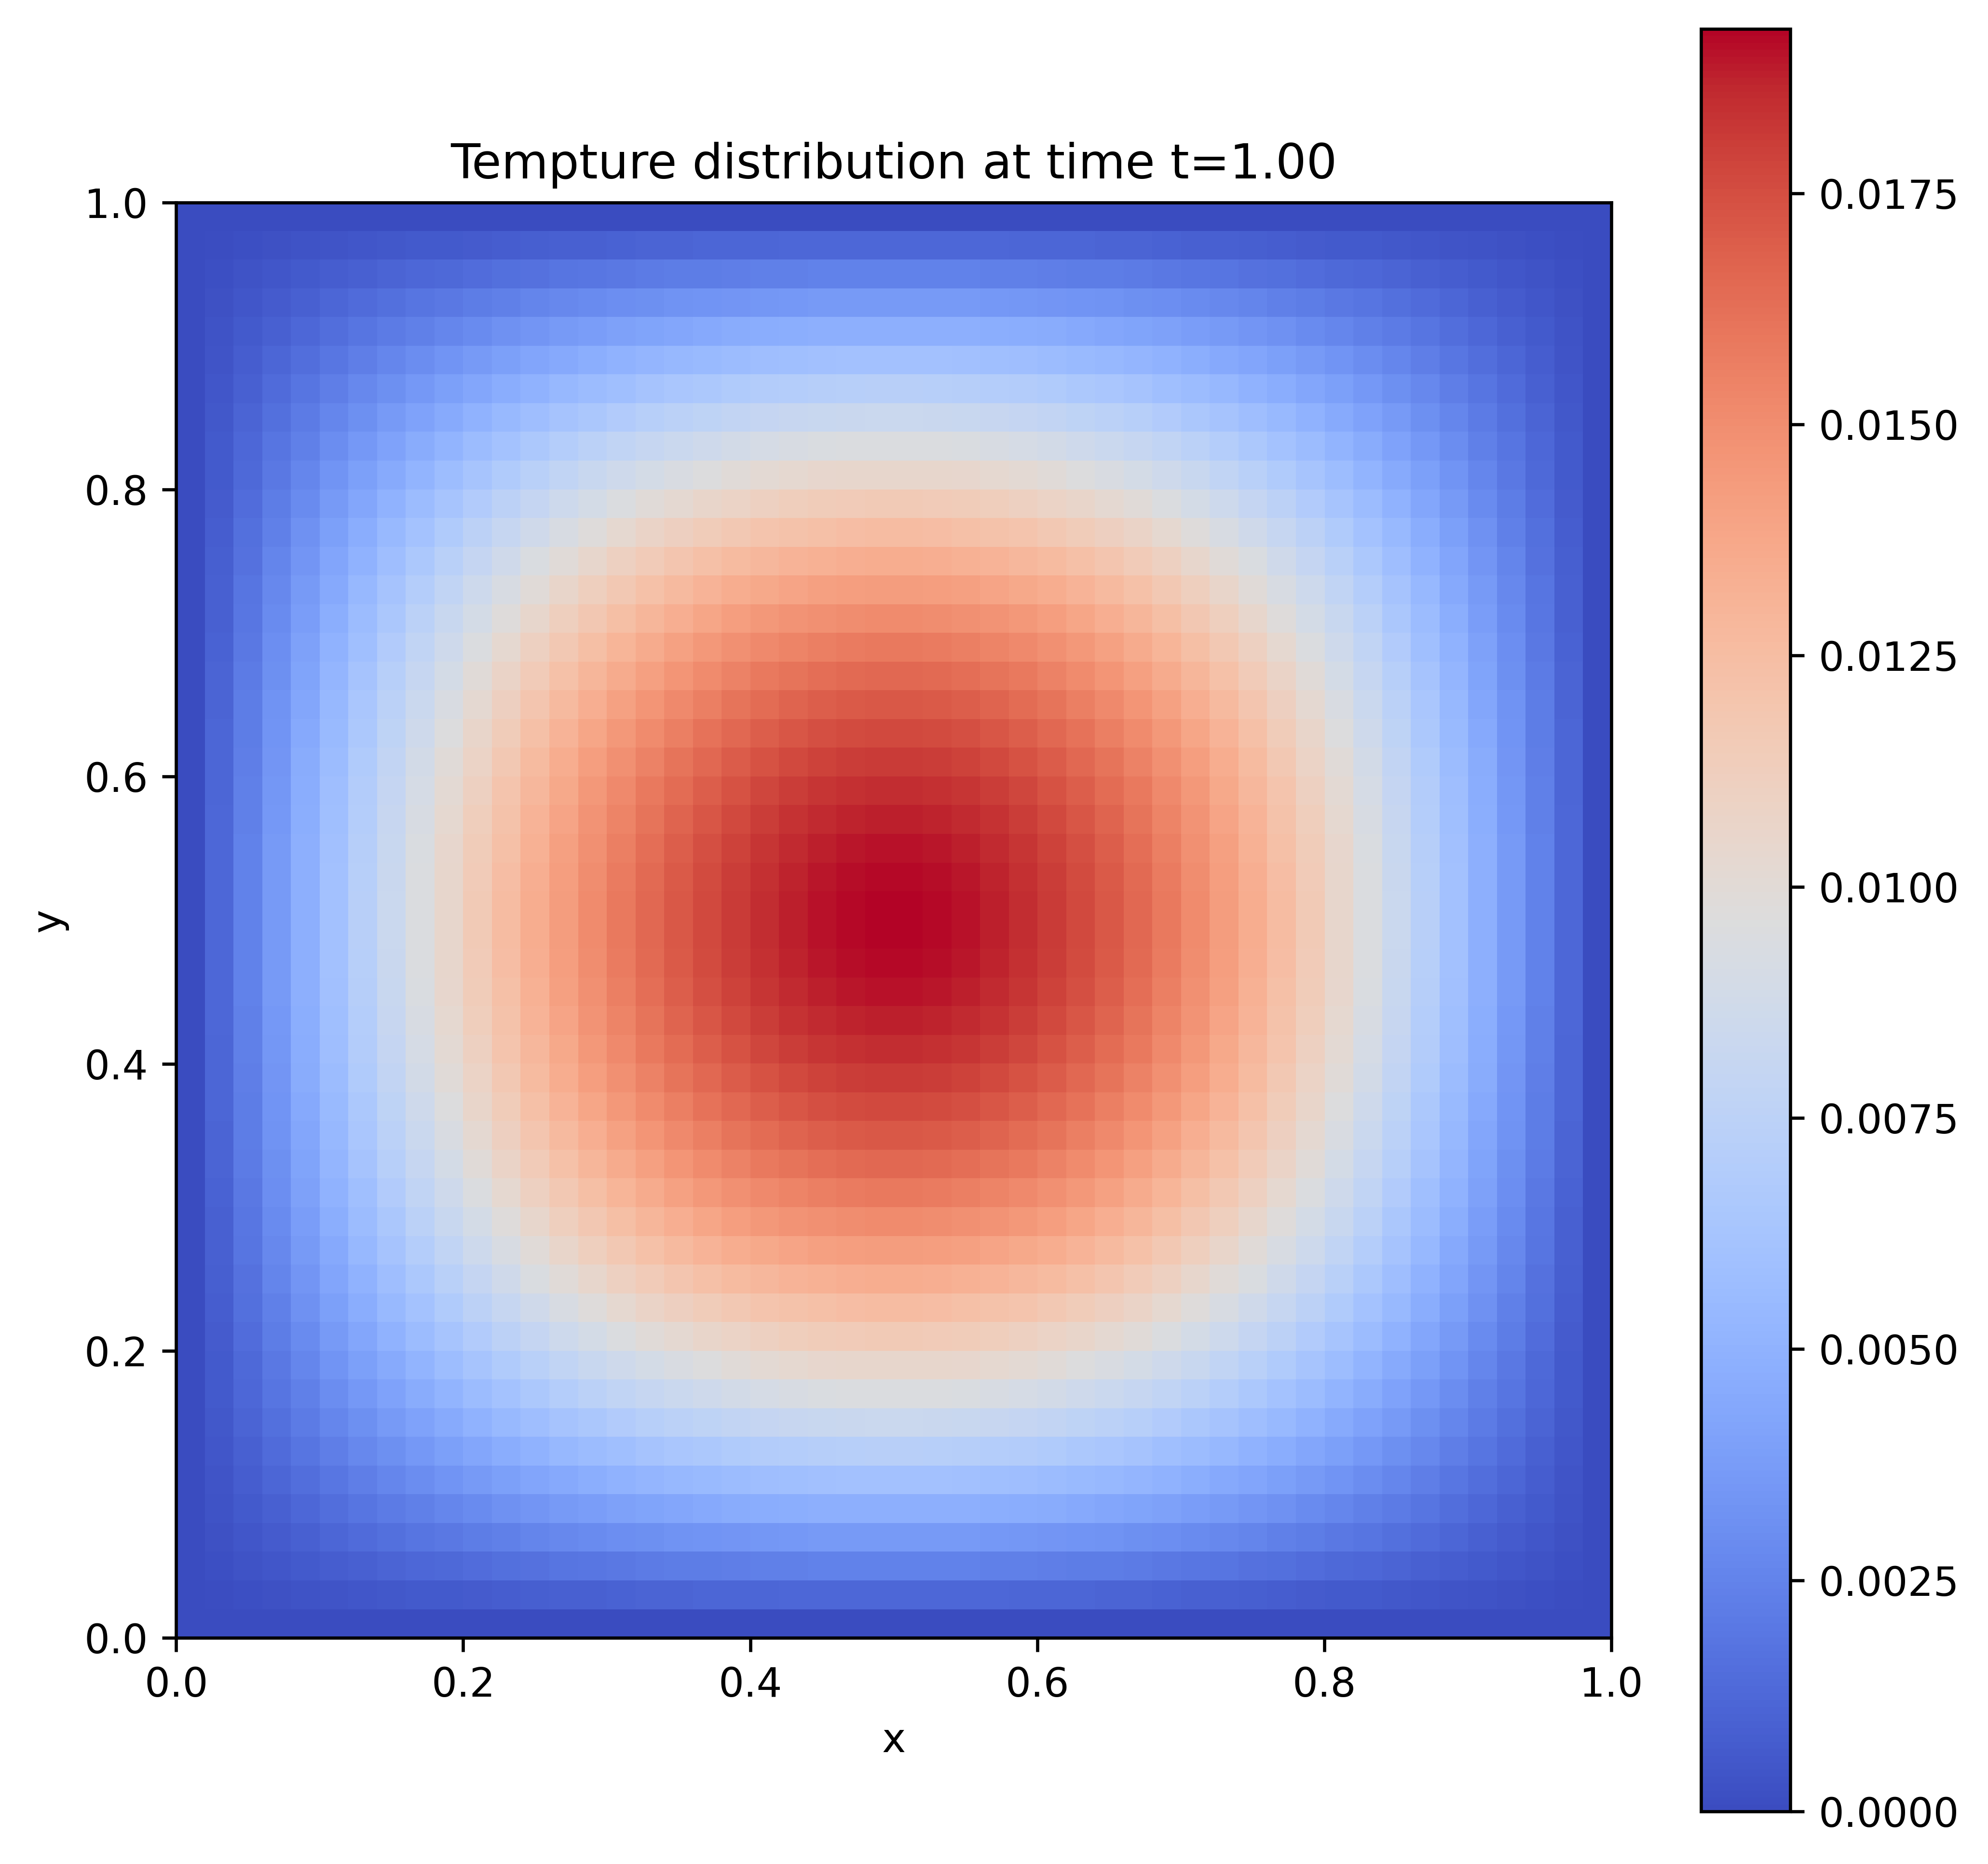

79/79 [==============================] - 0s 3ms/step


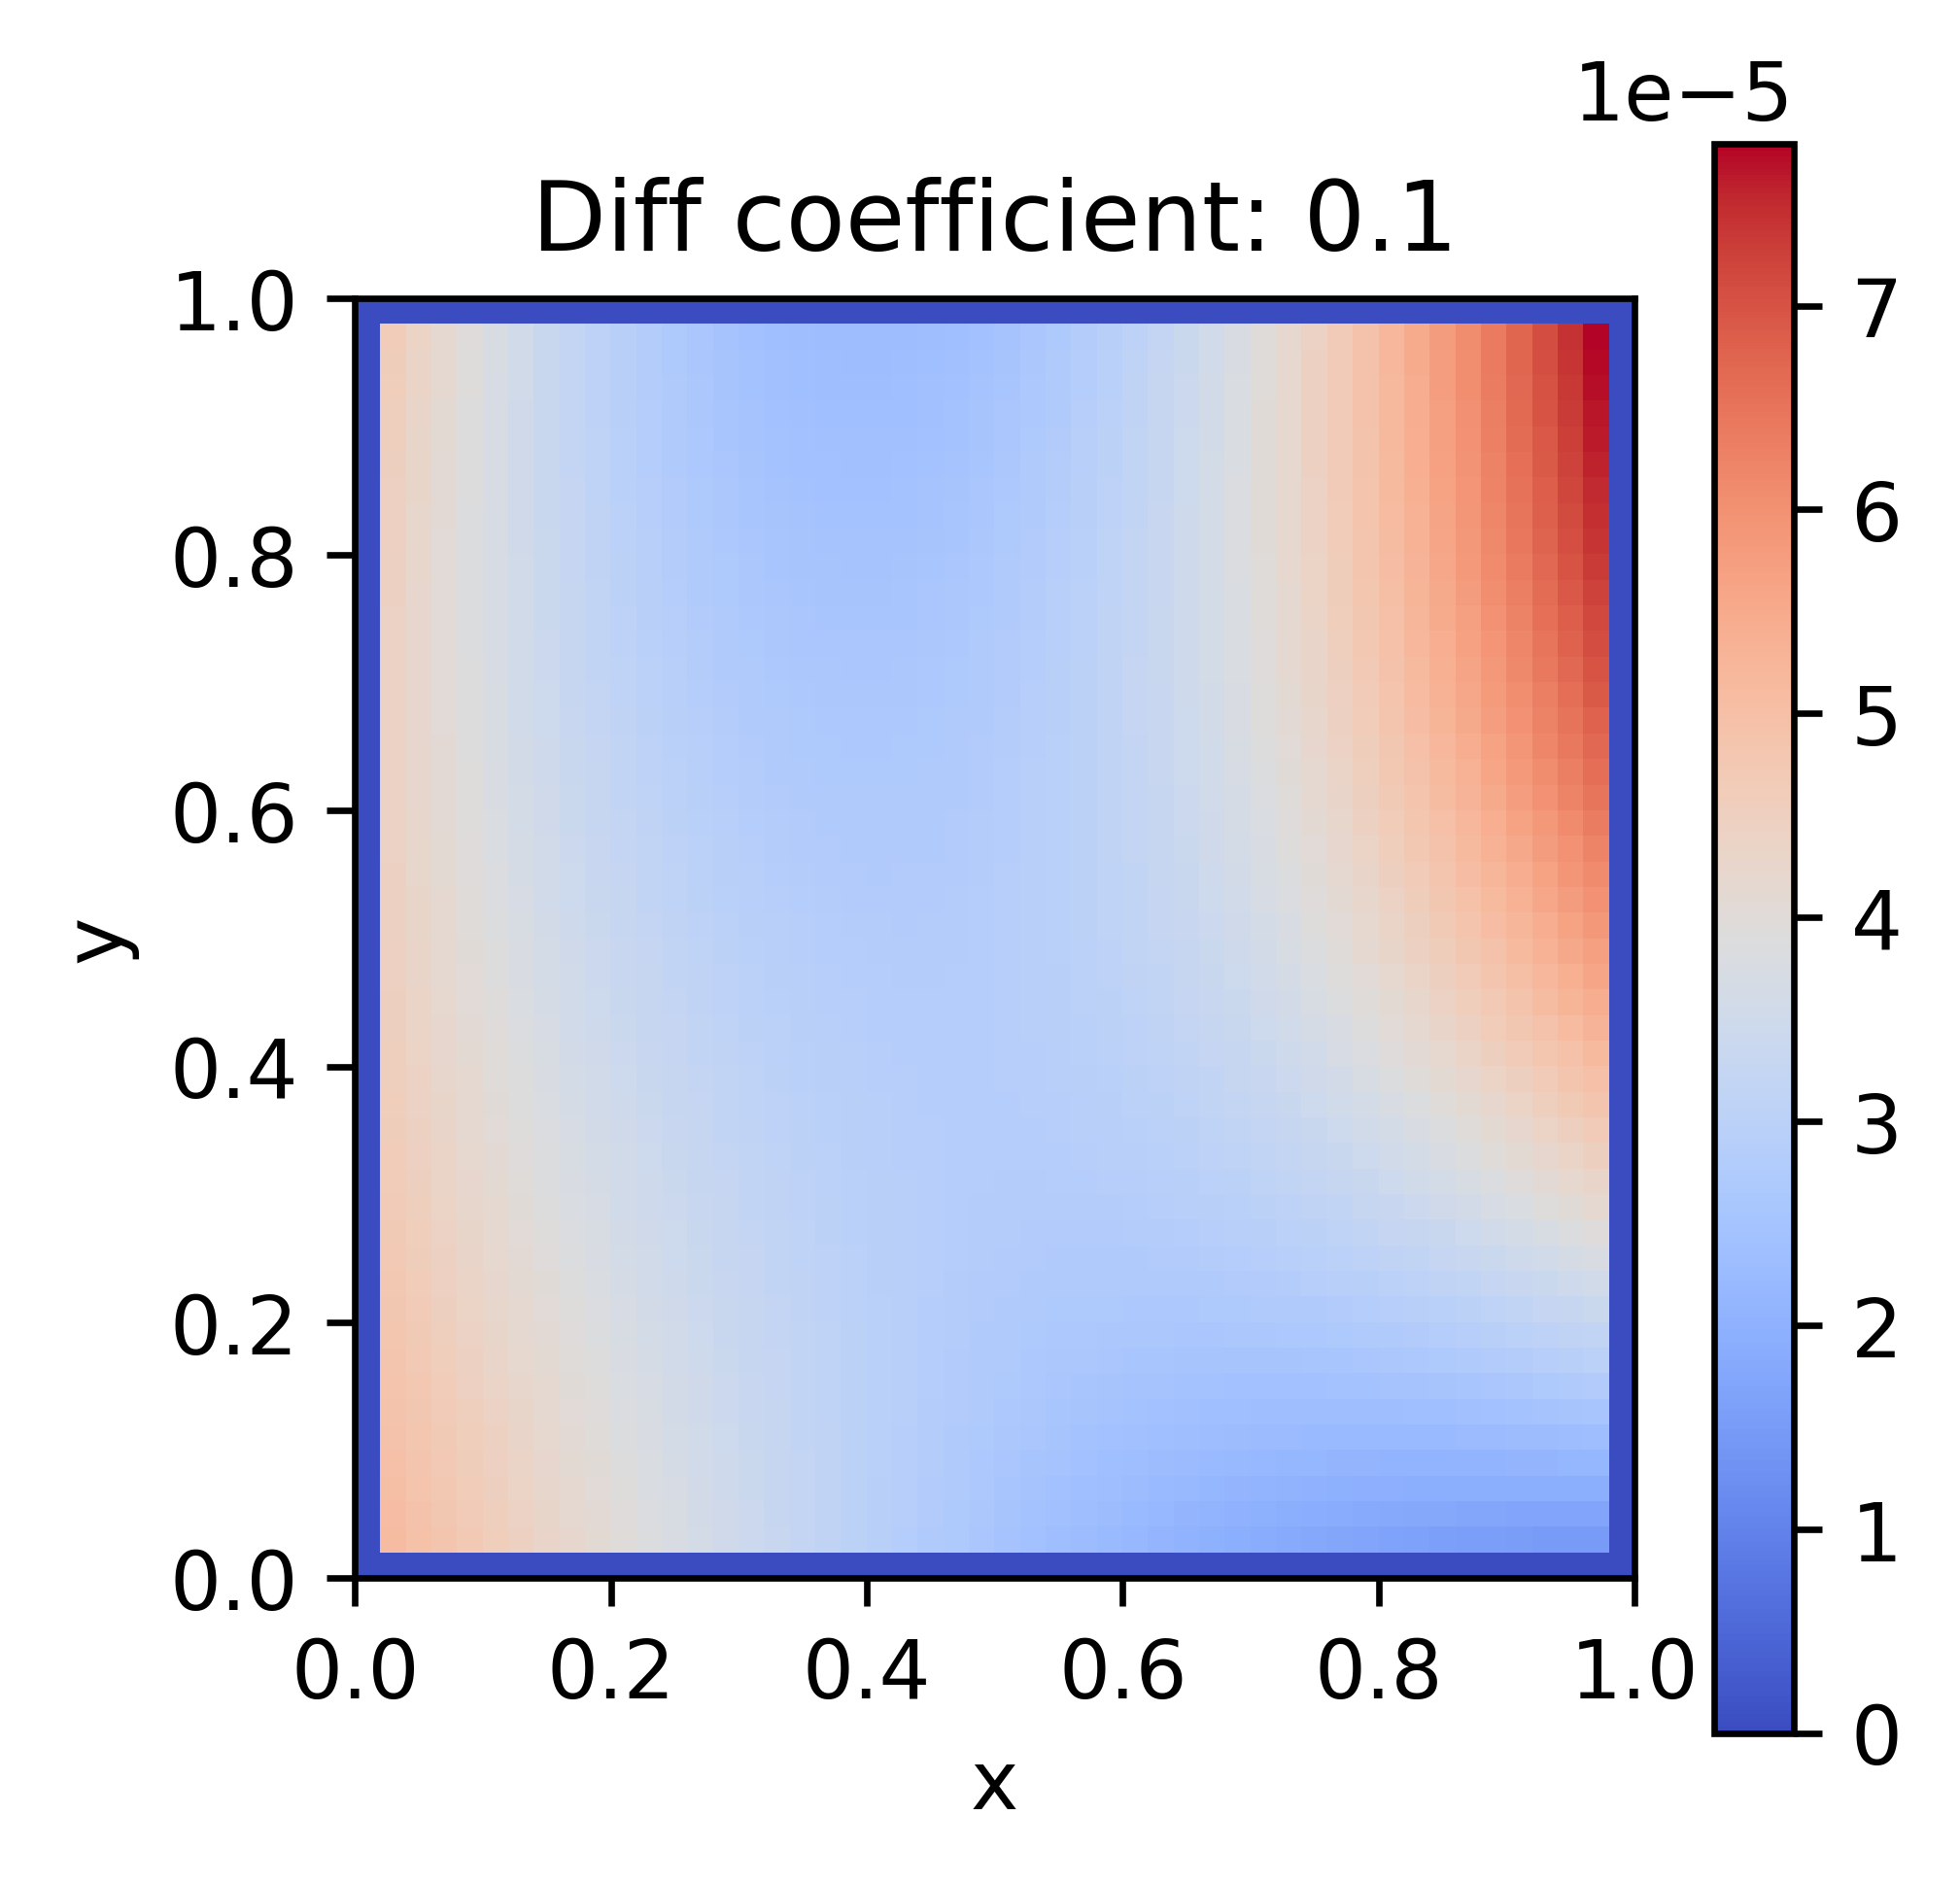

79/79 [==============================] - 0s 3ms/step


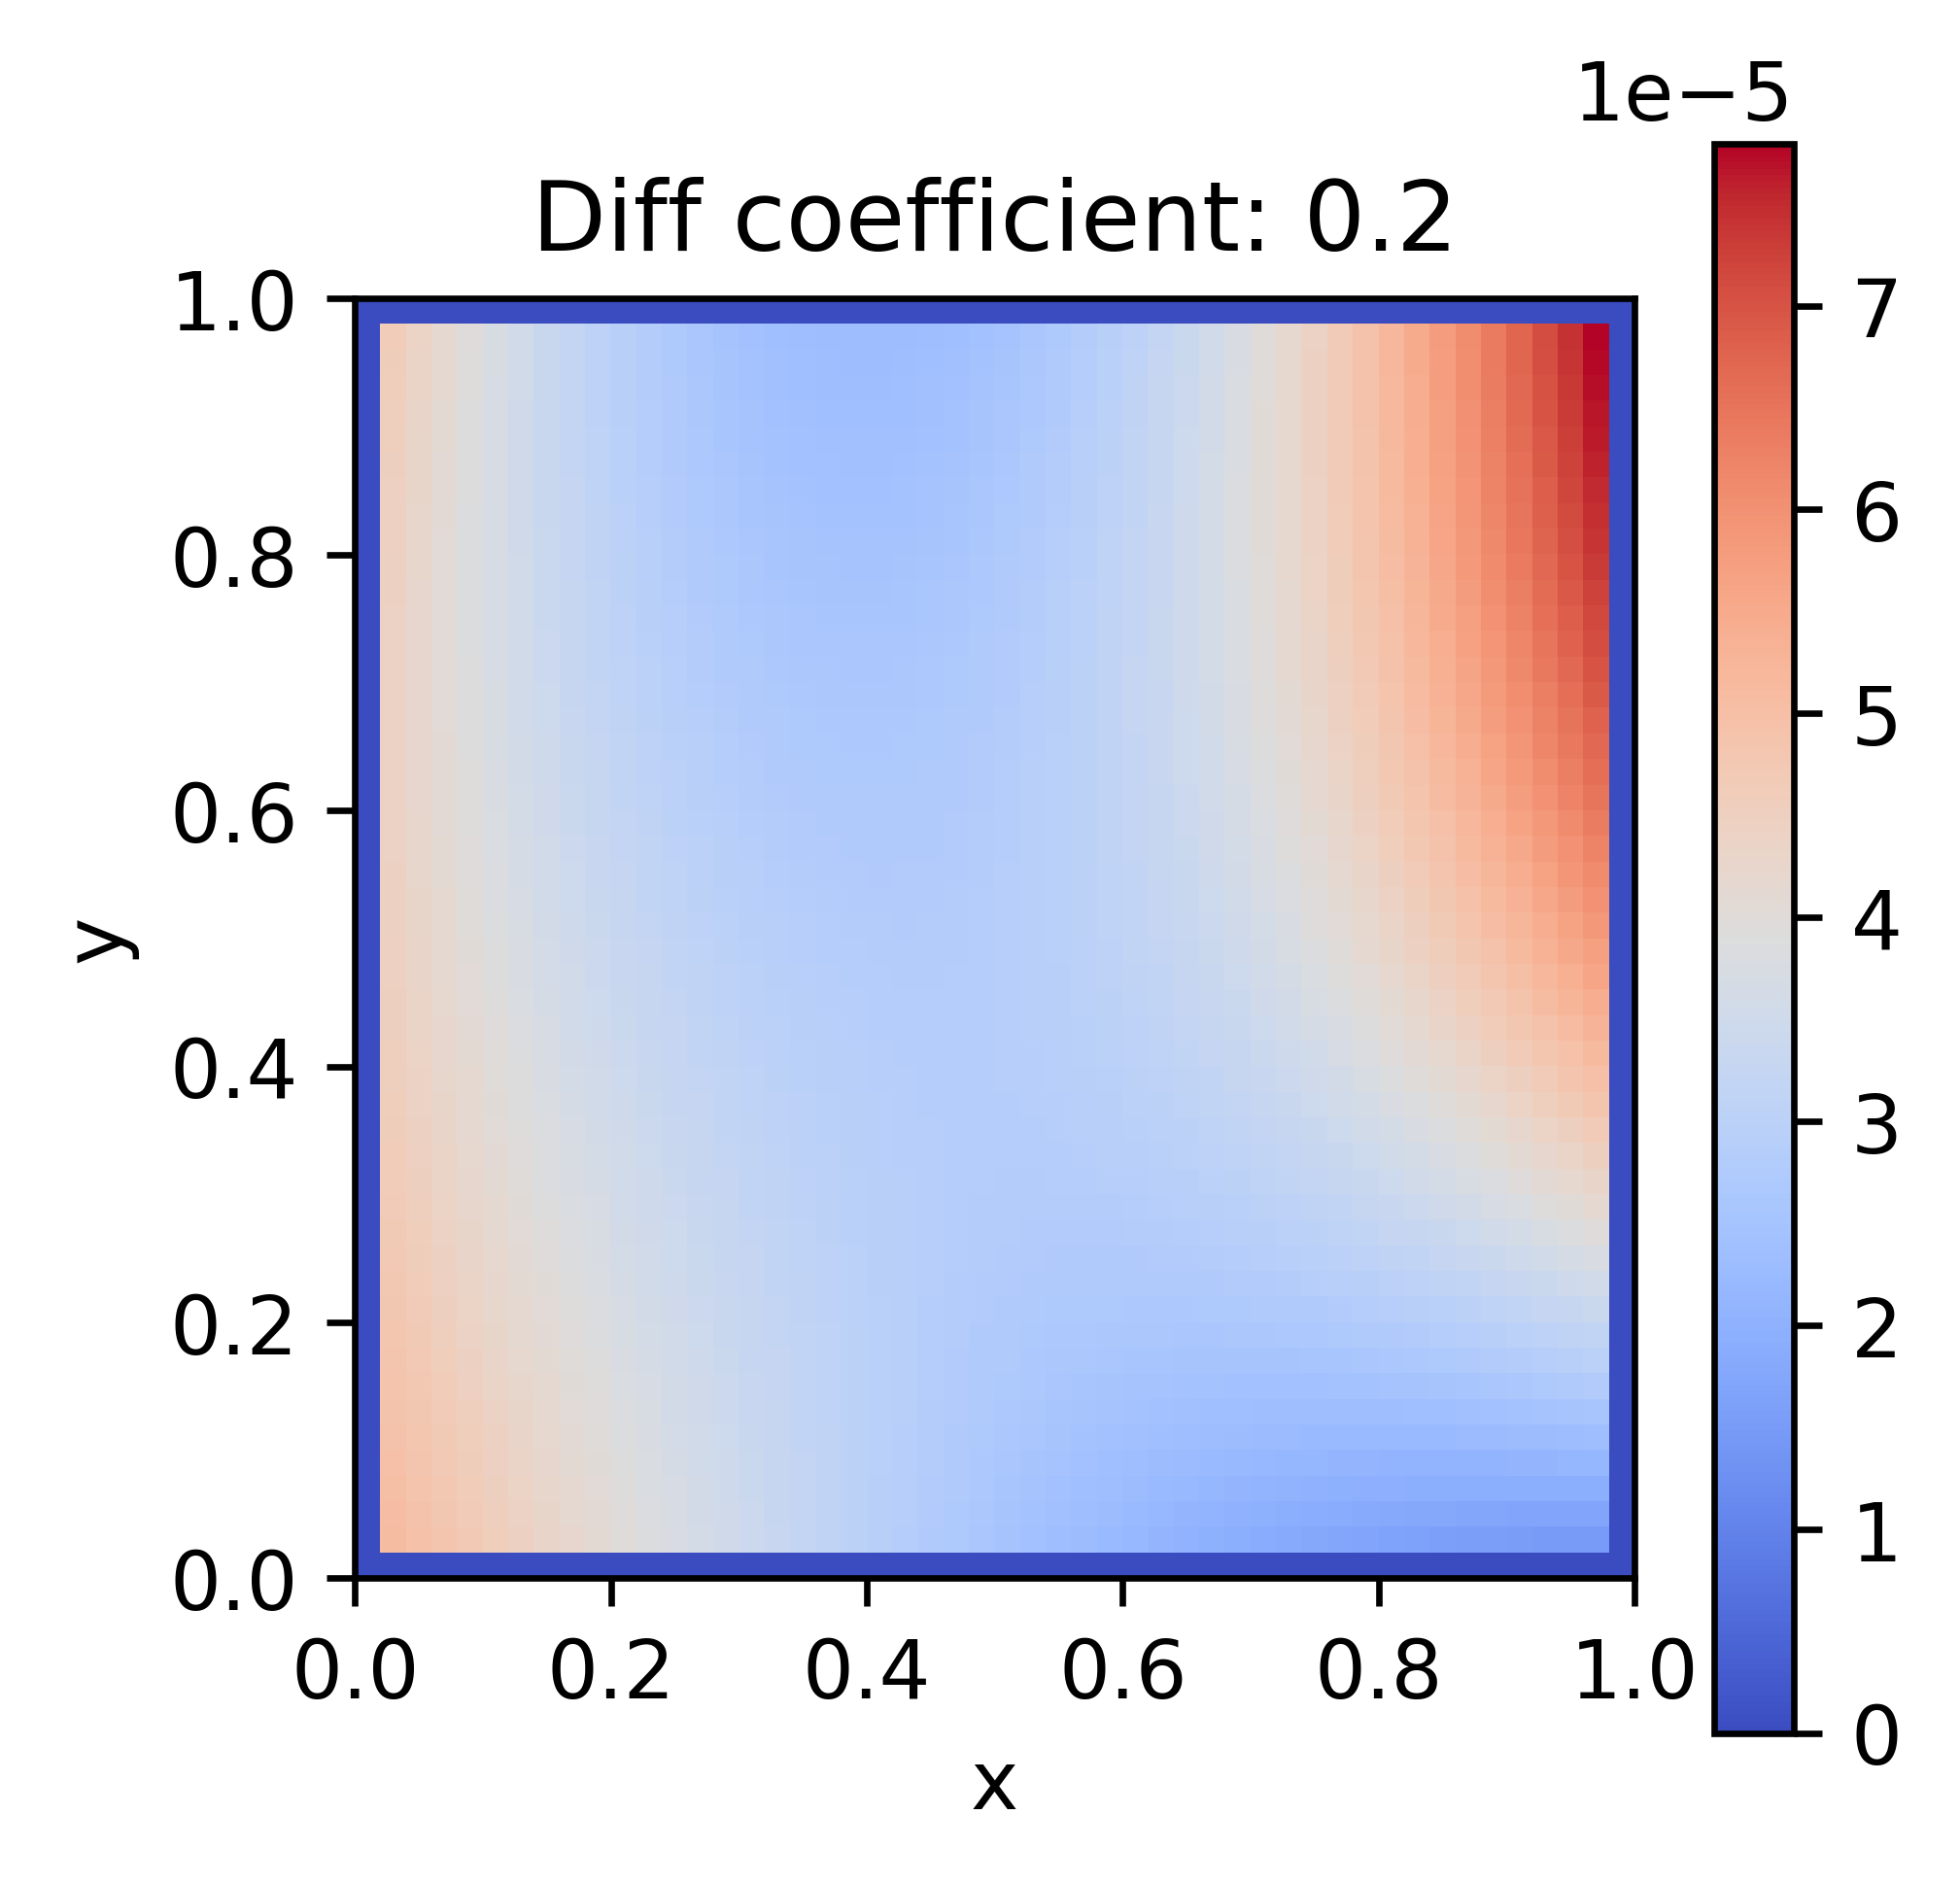

79/79 [==============================] - 0s 4ms/step


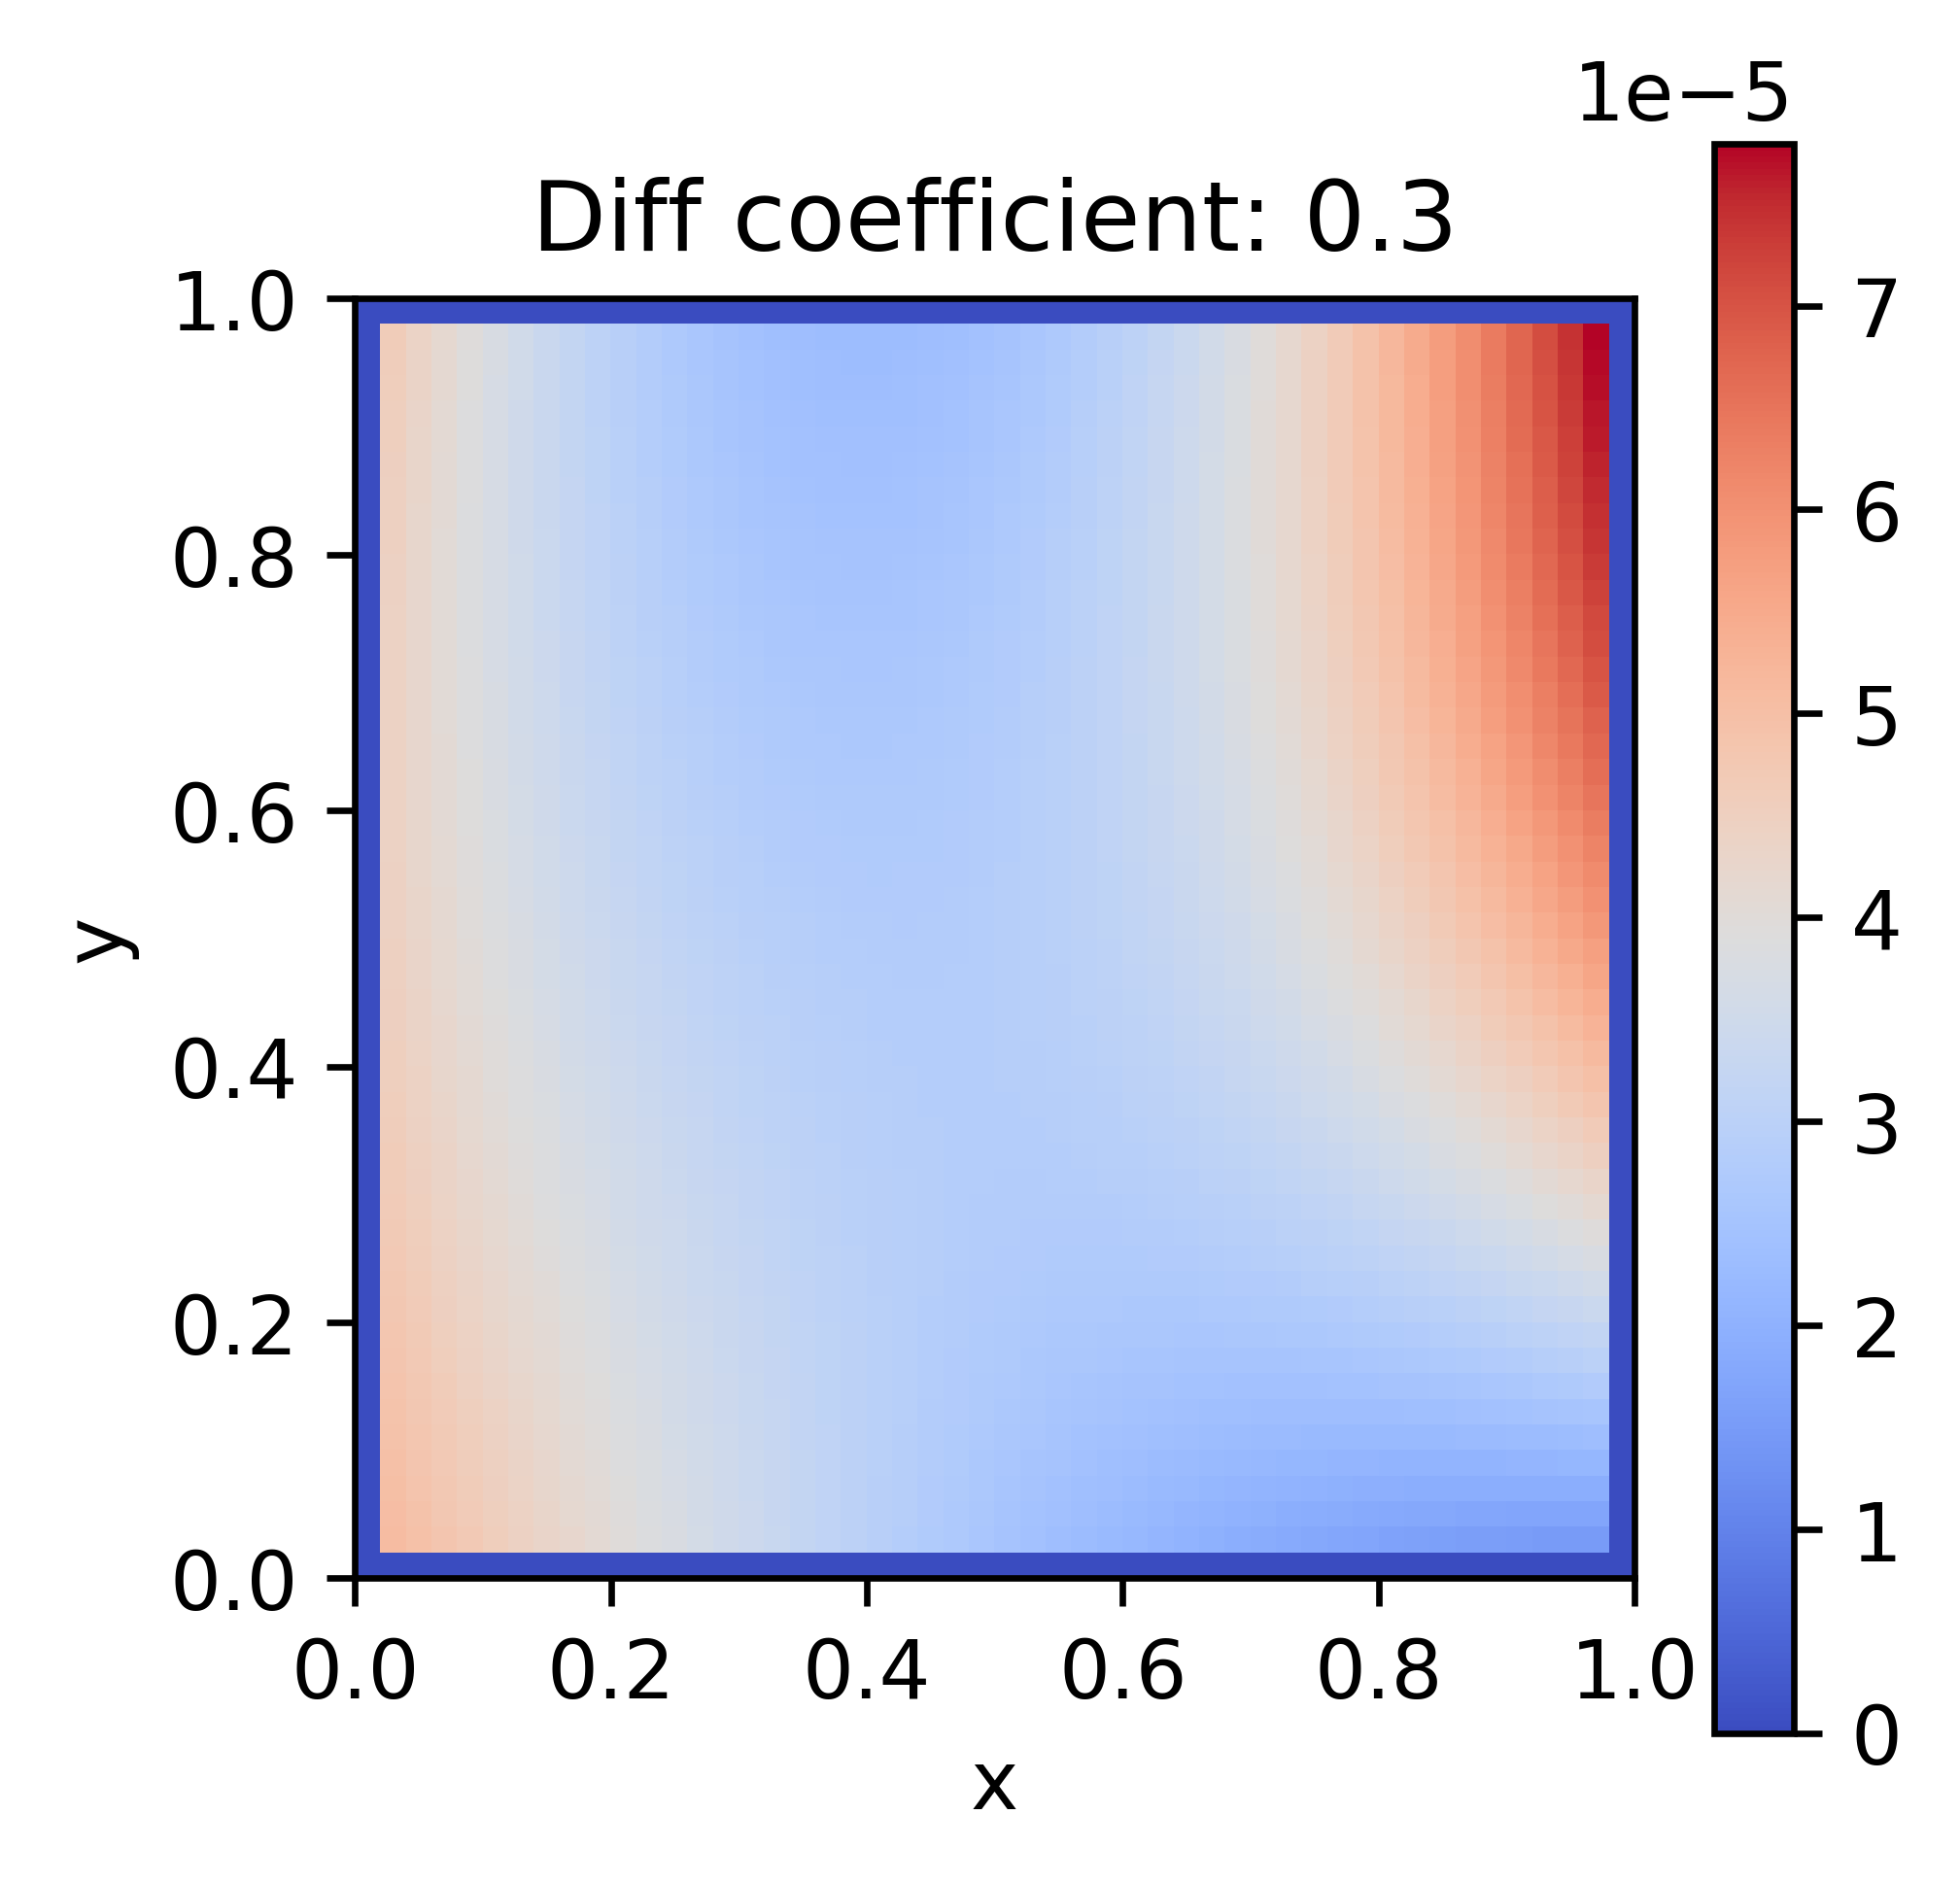

79/79 [==============================] - 0s 3ms/step


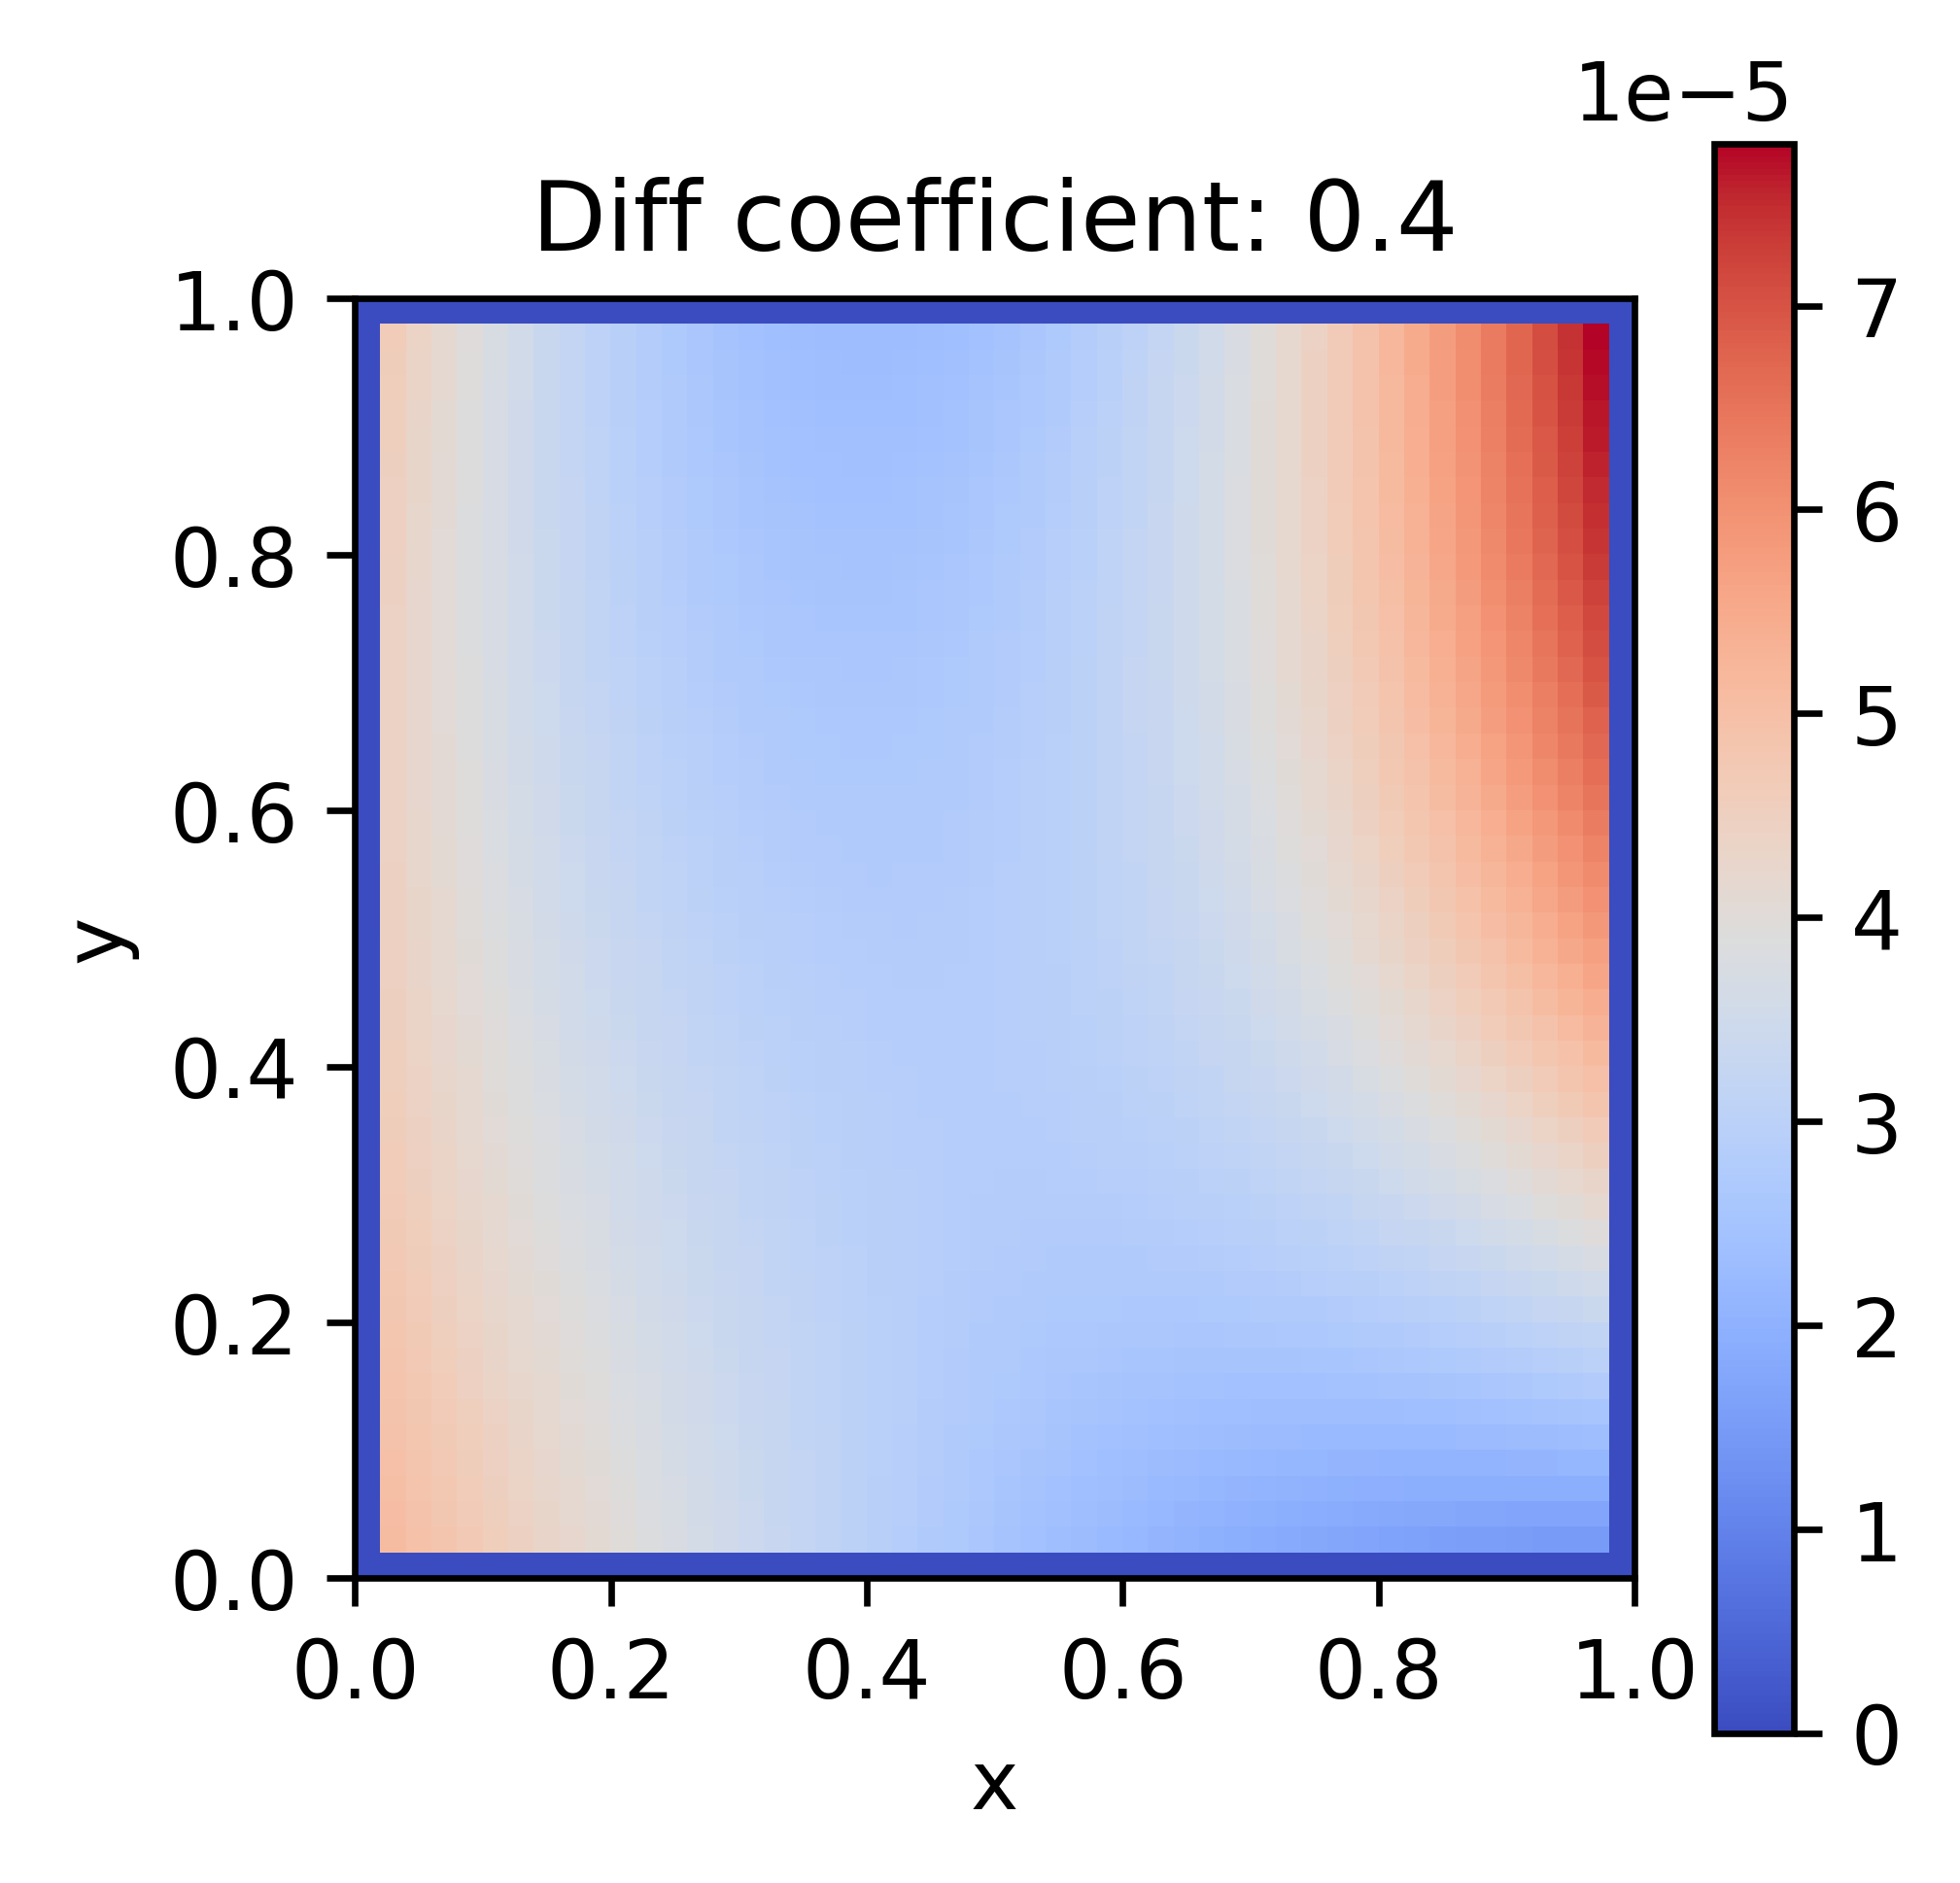

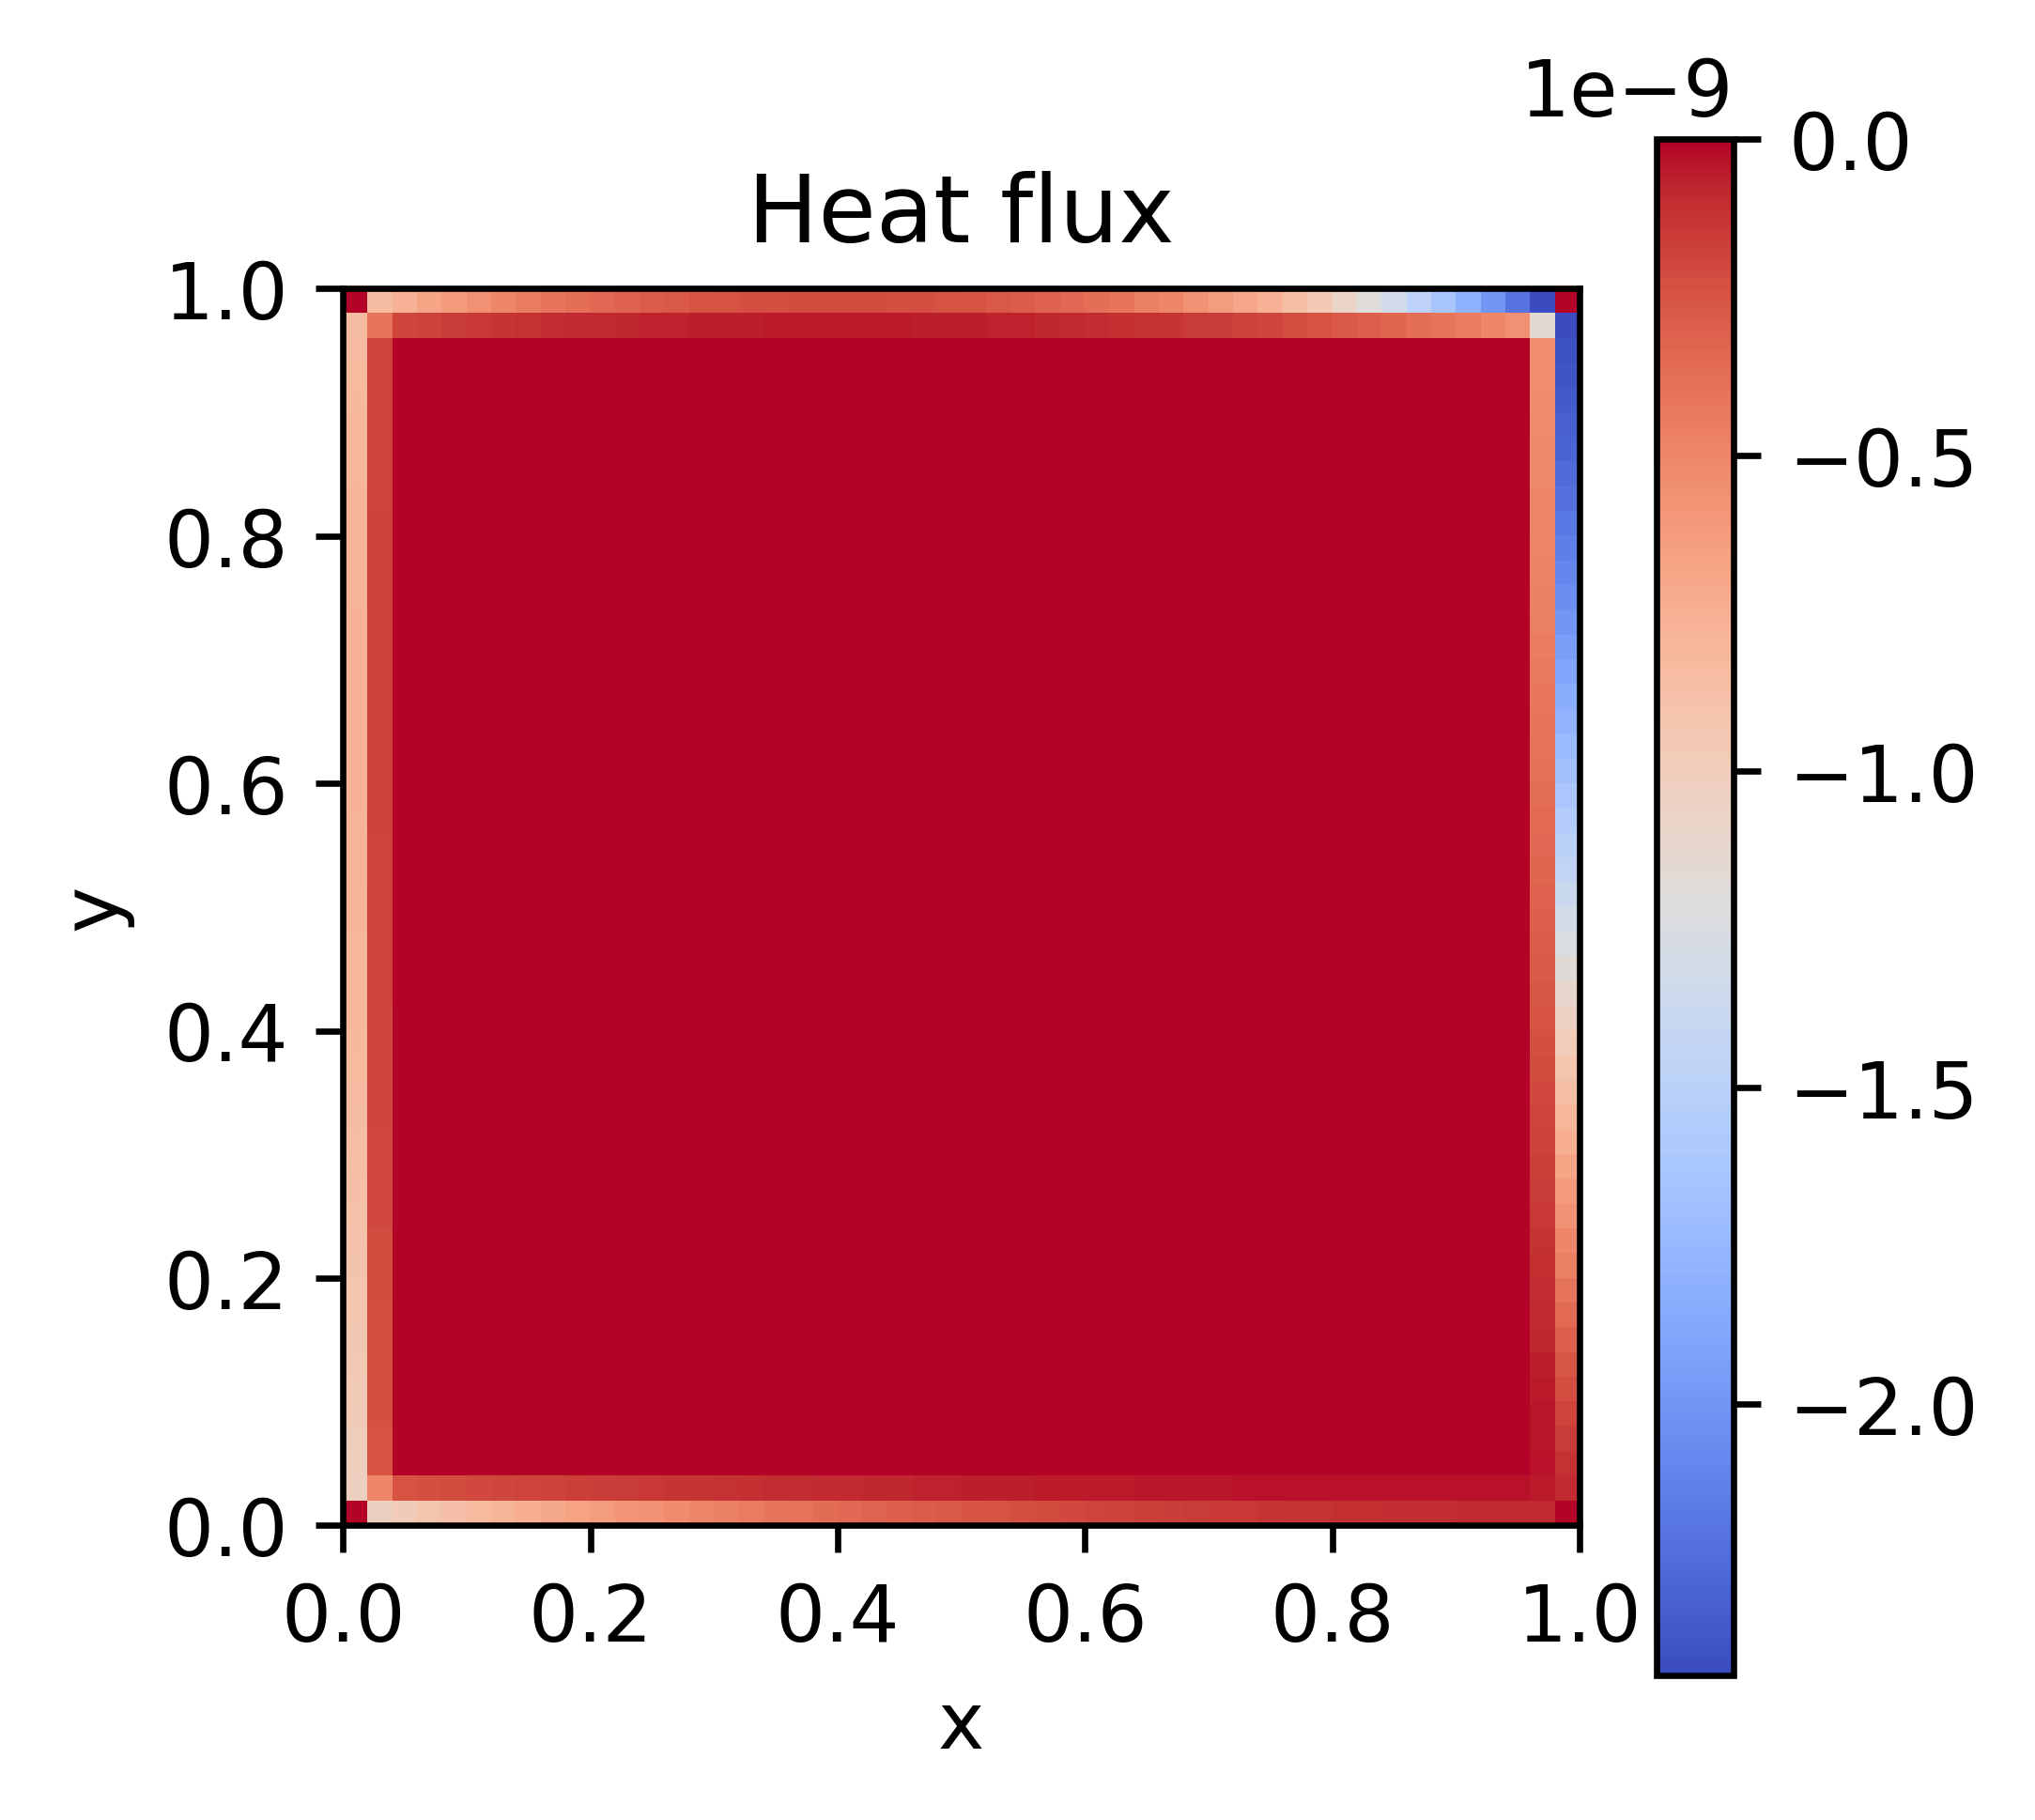

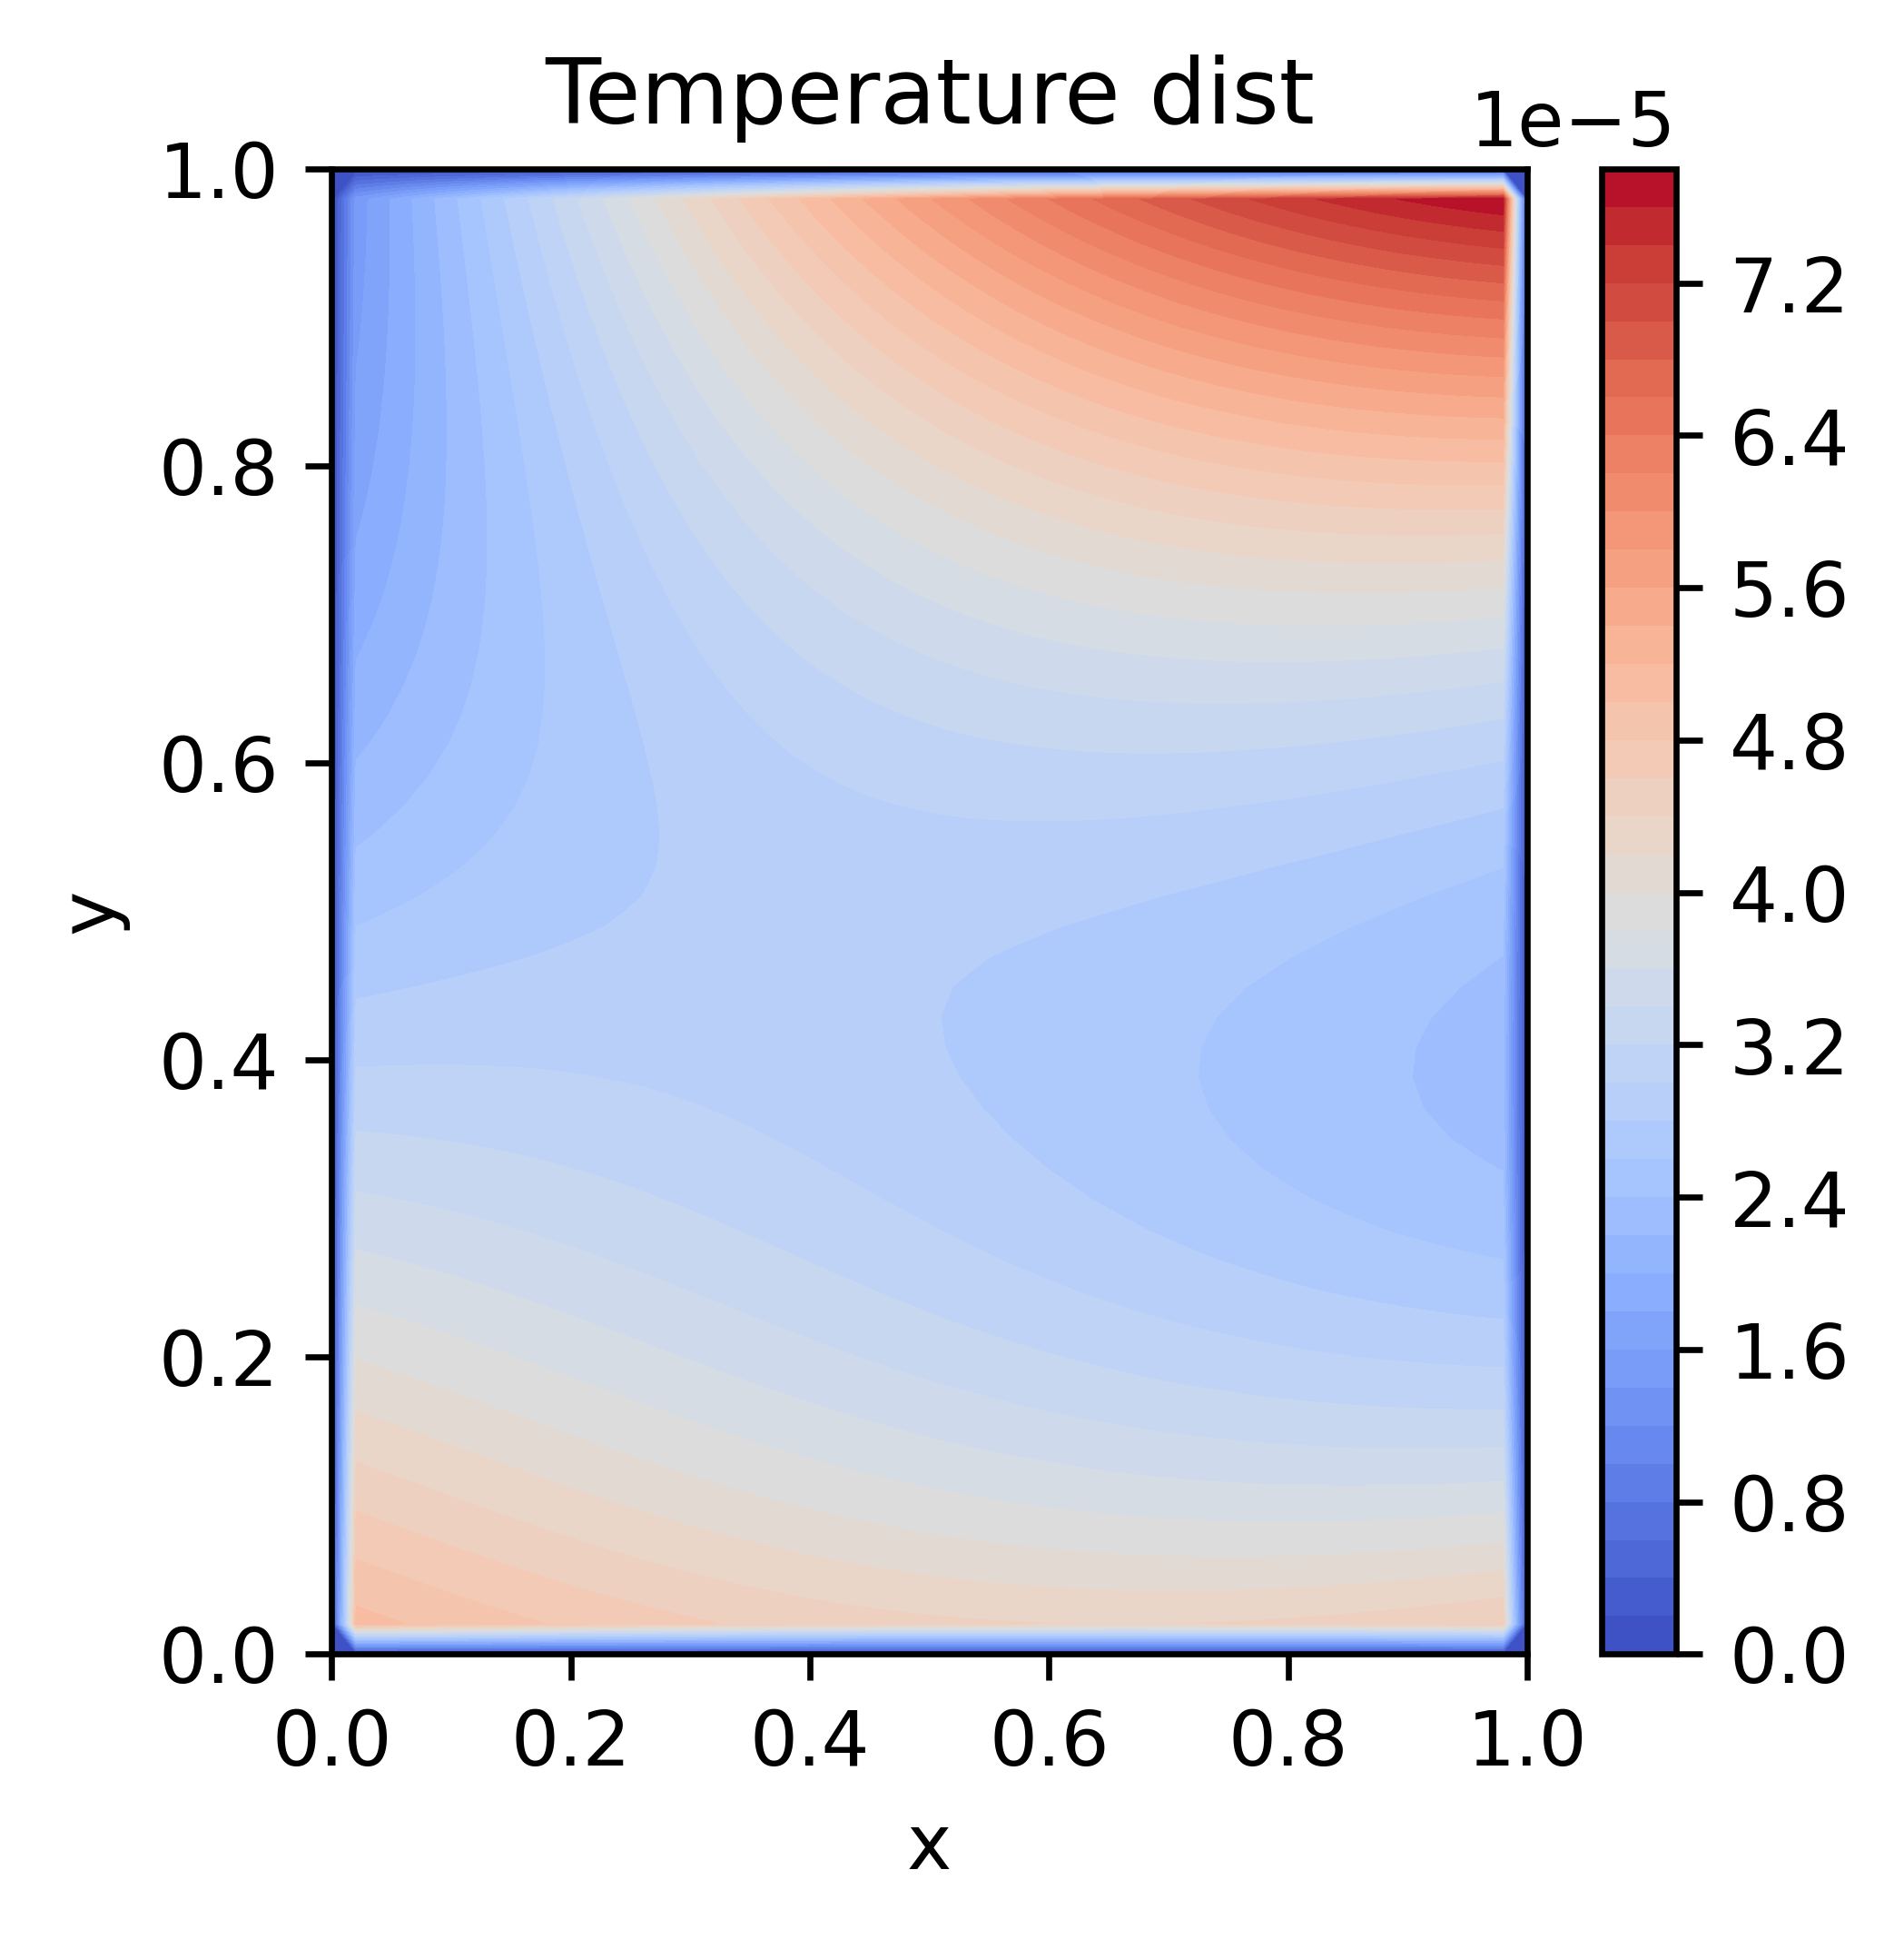

In [10]:

times = np.linspace(0, 1, 5)
#     plt.imshow(T_t.T, origin='lower'{}, Lx, 0, Ly], cmap='coolwarm')
#     plt.colorbar()
#     plt.title(f'temptin at time t={t:.2f}')
#     plt.xlabel('x')

D_values = [0.1, 0.2, 0.3, 0.4]

for t in times:
    T_star_t = np.exp(-t * D_values[-1] * np.pi**2) * np.sin(np.pi*X_star[:, 0]) * np.sin(np.pi*X_star[:, 1])
    T_t = T_star_t.reshape((nx, ny))
    
    # Apply the boundary conditions
    T_t[:, 0] = T_top
    T_t[:, -1] = T_bottom
    T_t[0, :] = T_left
    T_t[-1, :] = T_right
    
    # Plot the temperature distribution
    plt.figure(figsize=(8,8), dpi=600)
    plt.imshow(T_t.T, origin='lower', extent=[0, Lx, 0, Ly], cmap='coolwarm')
    plt.colorbar()
    plt.title(f'Tempture distribution at time t={t:.2f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.savefig('teemp_dist_time.png', bbox_inches='tight')
    plt.show()

for D in D_values:
    def diffusivity(x, y):
        return D

    T_star = model.predict(X_star)
    T = T_star.reshape((nx, ny))

    T[:, 0] = T_top
    T[:, -1] = T_bottom
    T[0, :] = T_left
    T[-1, :] = T_right

    plt.figure(figsize=(3.54,3.54), dpi=600)
    plt.imshow(T.T, origin='lower', extent=[0, Lx, 0, Ly], cmap='coolwarm')
    plt.colorbar()
    plt.title(f'Diff coefficient: {D}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.savefig('diff_coeff.png', bbox_inches='tight')
    plt.show()

grad_x, grad_y = np.gradient(T)
heat_flux = -diffusivity(X, Y) * (grad_x**2 + grad_y**2)

plt.figure(figsize=(3.54,3.54), dpi=600)
plt.imshow(heat_flux.T, origin='lower', extent=[0, Lx, 0, Ly], cmap='coolwarm')
plt.colorbar()
plt.title('Heat flux')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('heat_flux.png', bbox_inches='tight')
plt.show()
# (T_t.T, origin='lower'{}, Lx, 0, Ly], cmap='coolwarm')
#     plt.colorbar()
#     plt.title(f'temp
plt.figure(figsize=(3.54,3.54), dpi=600)
plt.contourf(X, Y, T, levels=50, cmap='coolwarm')
plt.colorbar()
plt.title('Temperature dist')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('temp_dist.png', bbox_inches='tight')
plt.show()